# Crop Analysis and Prediciton using Machine Learning

# Defining Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
#defining Data Frame
df = pd.read_csv('crop_analysis.csv')
df

N      P      K  temperature   humidity        ph    rainfall   label
0     90.0   42.0   43.0    20.879744  82.002744  6.502985  202.935536    rice
1     85.0   58.0   41.0    21.770462  80.319644  7.038096  226.655537    rice
2     60.0   55.0   44.0    23.004459  82.320763  7.840207  263.964248    rice
3     74.0   35.0   40.0    26.491096  80.158363  6.980401  242.864034    rice
4     78.0   42.0   42.0    20.130175  81.604873  7.628473  262.717340    rice
...    ...    ...    ...          ...        ...       ...         ...     ...
2446  19.0  123.0  200.0    34.760860  81.035448  6.167014   65.704300  grapes
2447  31.0  136.0  197.0    31.110473  83.340109  5.653776   71.430016  grapes
2448   4.0  134.0  200.0    28.578288  80.956290  5.840256   73.342321  grapes
2449  39.0  139.0  201.0    41.186649  81.017834  5.539981   68.688959  grapes
2450   8.0  127.0  196.0    27.027661  83.170939  5.833302   70.956660  grapes

[2451 rows x 8 columns]

In [4]:
df.describe()

N            P            K  temperature     humidity  \
count  2447.000000  2446.000000  2447.000000  2451.000000  2432.000000   
mean     49.832857    53.678250    49.741725    25.725437    70.883978   
std      36.426387    33.742619    52.887648     5.191111    21.734036   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    21.000000    22.747679    57.653786   
50%      37.000000    50.000000    32.000000    25.658425    80.183933   
75%      83.000000    68.000000    48.000000    28.705790    88.610233   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2434.000000  2447.000000  
mean      6.422136   104.849166  
std       0.785970    55.998571  
min       0.000000    20.211267  
25%       5.919701    66.318127  
50%       6.391953    94.709920  
75%       6.876446   122.596582  
max       9.935091   298.560117

In [5]:
df.shape

(2451, 8)

In [6]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [7]:
df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
df.ndim

2

In [9]:
df.size

19608

In [10]:
df.isnull().sum()

N               4
P               5
K               4
temperature     0
humidity       19
ph             17
rainfall        4
label           0
dtype: int64

In [11]:
df.isnull().mean()

N              0.001632
P              0.002040
K              0.001632
temperature    0.000000
humidity       0.007752
ph             0.006936
rainfall       0.001632
label          0.000000
dtype: float64

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(2396, 8)

In [13]:
df.size

19168

In [14]:
df['N'] = df['N'].fillna(df['N'].median())
df['P'] = df['P'].fillna(df['P'].mean())
df['K'] = df['K'].fillna(df['K'].mean())
df['humidity'] = df['humidity'].fillna(df['humidity'].median())
df['ph'] = df['ph'].fillna(df['ph'].median())
df['rainfall'] = df['rainfall'].fillna(df['rainfall'].mean())

In [15]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [16]:
df.shape

(2396, 8)

# Dataset Plotting

# Exploratory Data Analysis
Heatmap to check null/missing values

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

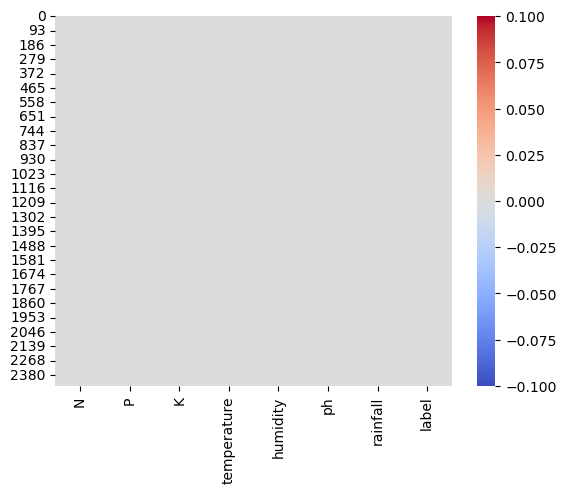

In [18]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Density'>

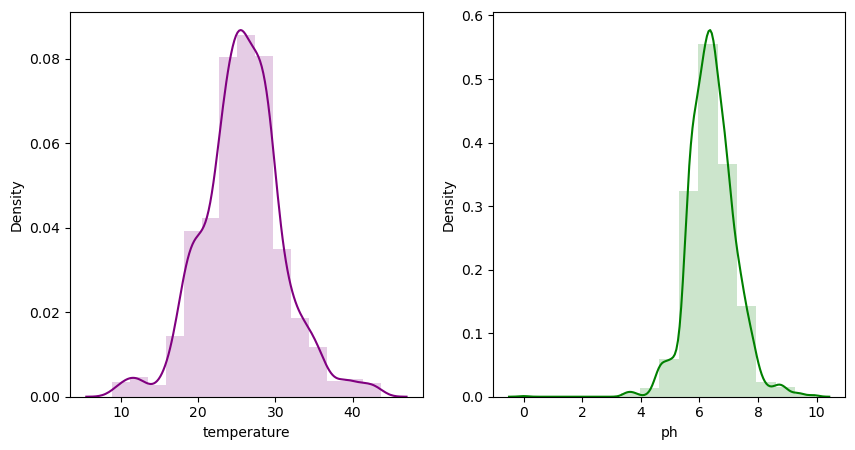

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)

# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})

sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

A quick check if the dataset is balanced or not. If found imbalanced, we would have to downsample some targets which are more in quantity

<AxesSubplot:xlabel='count', ylabel='label'>

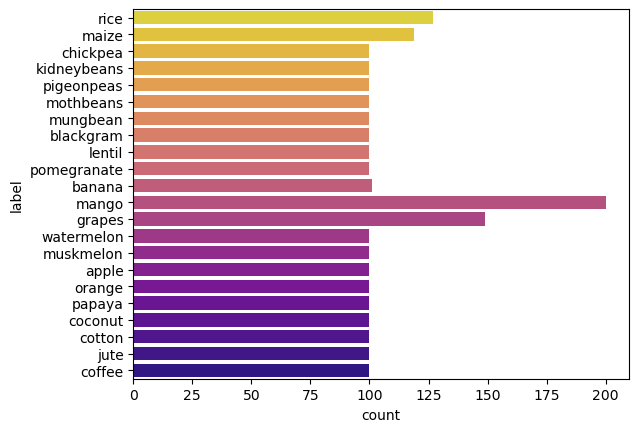

In [20]:
sns.countplot(y='label',data=df, palette="plasma_r")

A crucial figure that shows the diagonal distribution of two features over all possible combinations! It is quite helpful to visualize how different classes are from one another in a specific space.

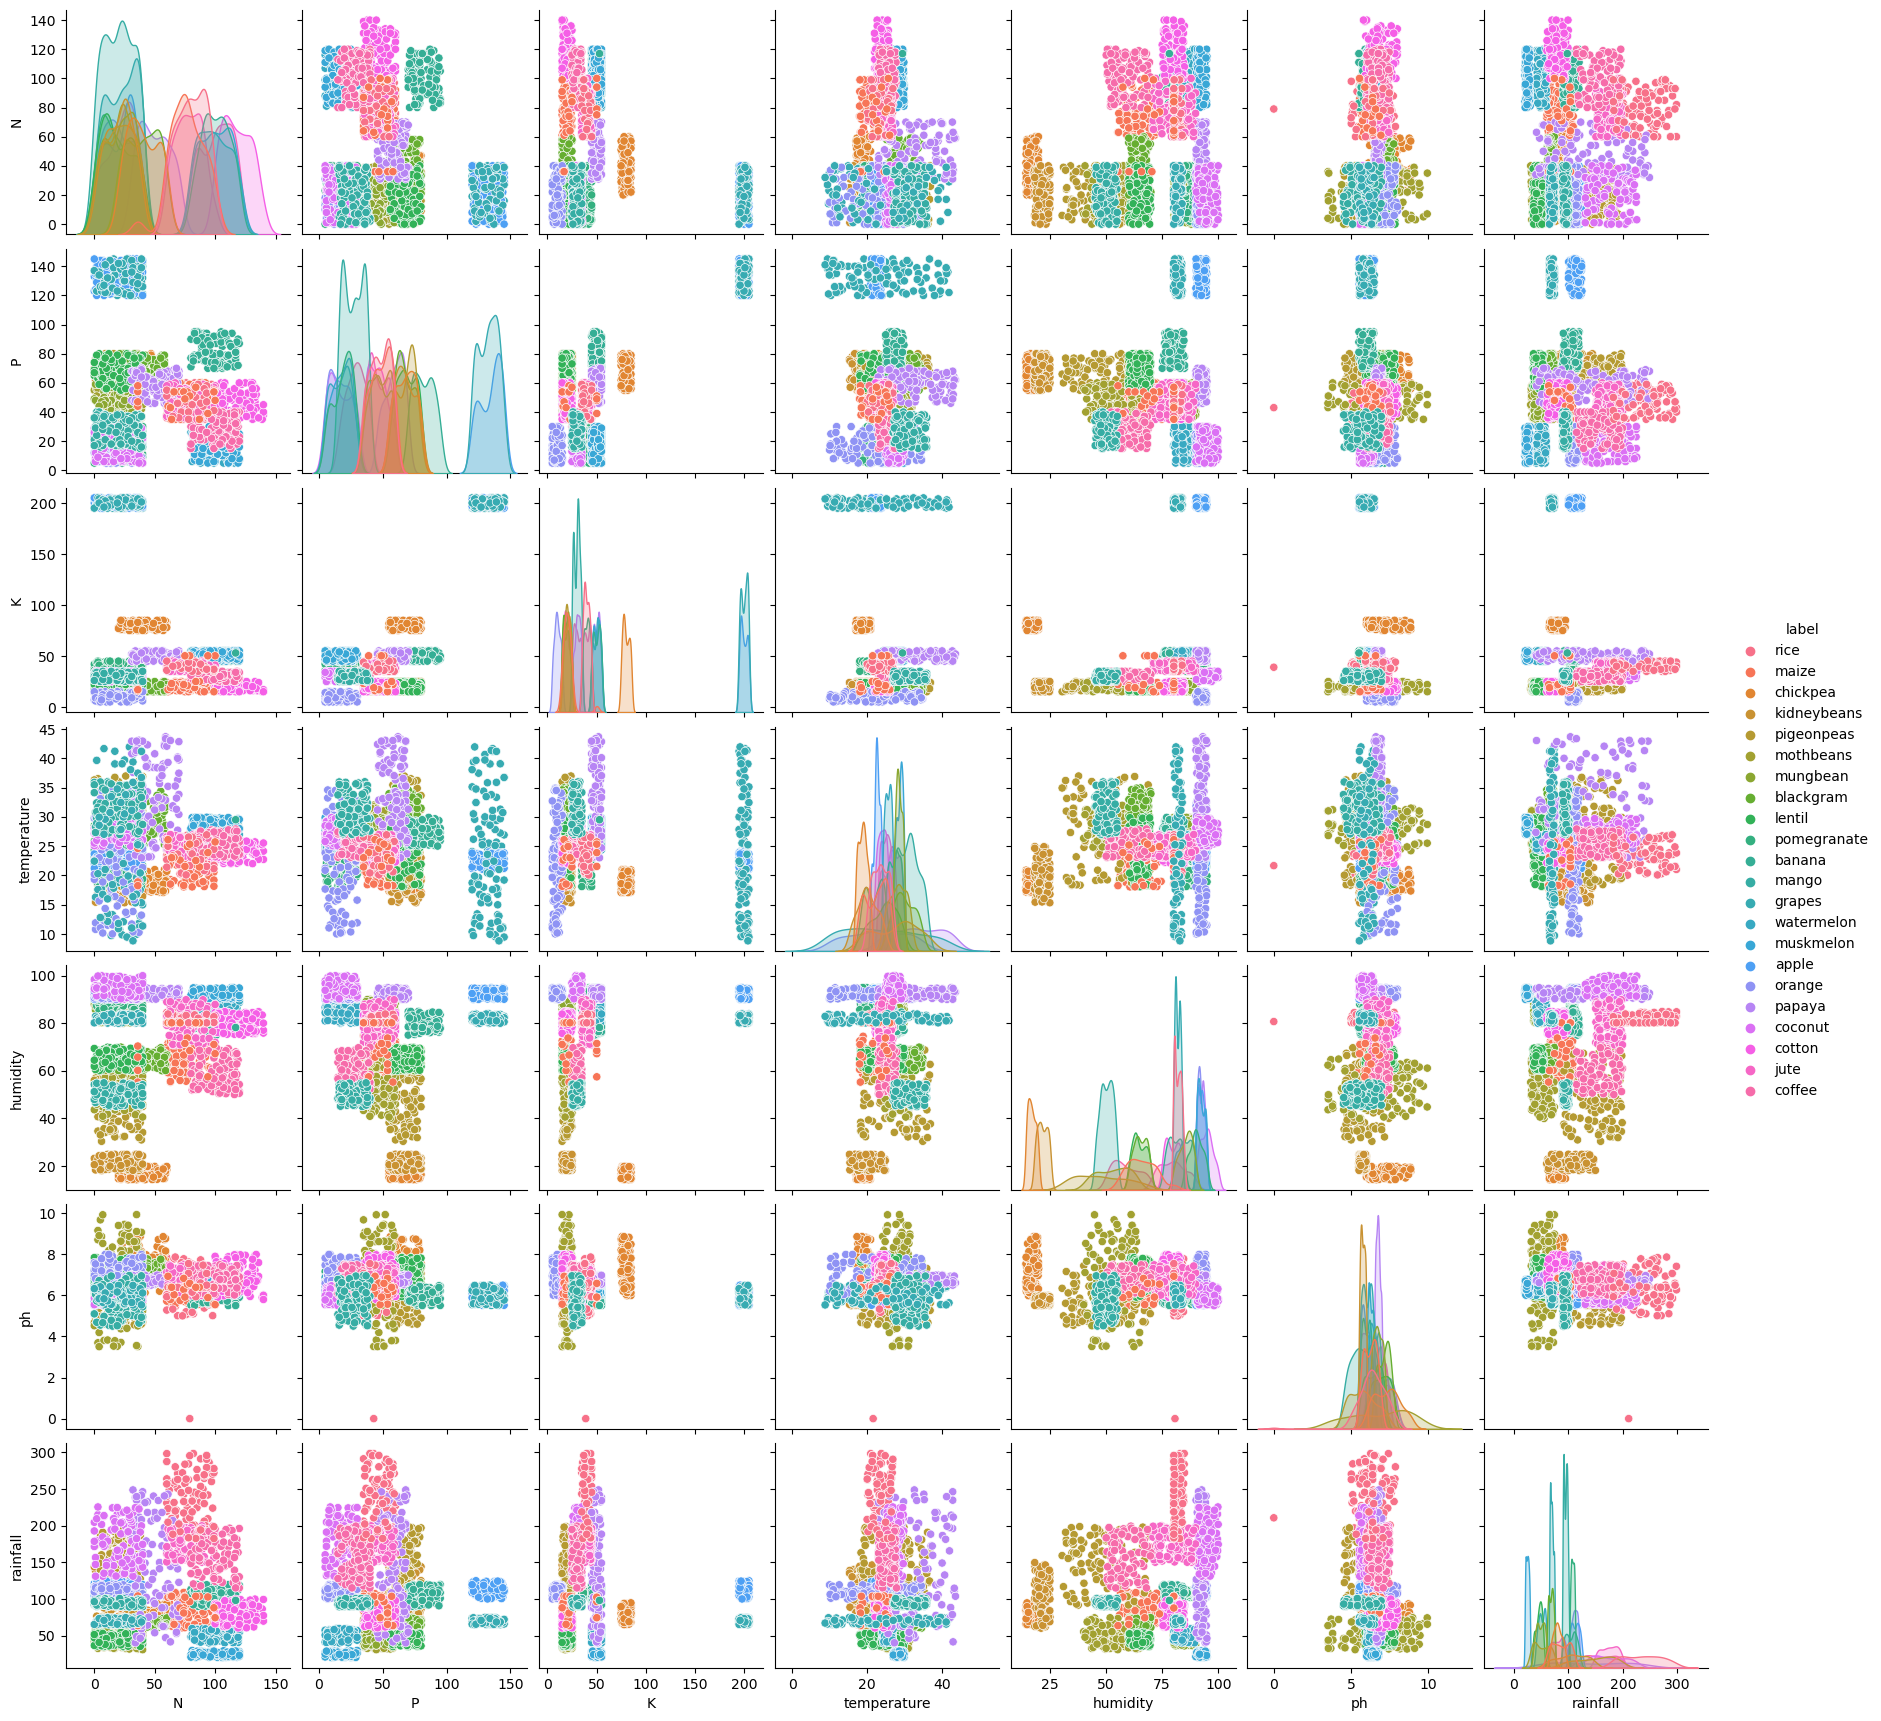

In [21]:
sns.pairplot(df, hue = 'label')

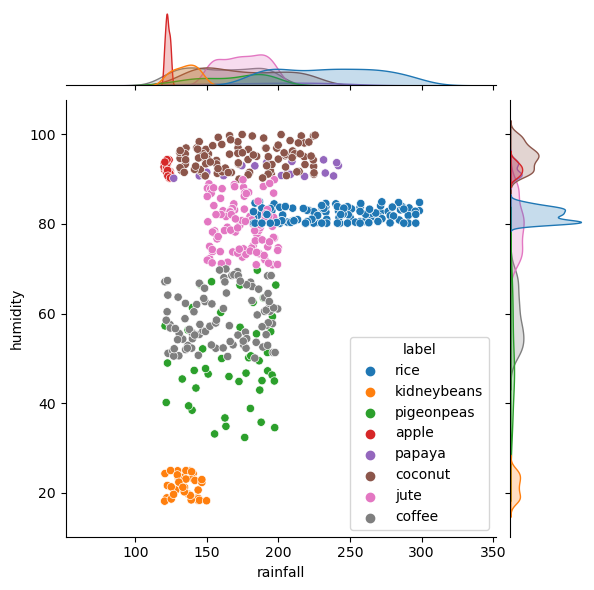

In [22]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

This graph correlates with average potassium (K) and average nitrogen (N) value (both>50).

These soil ingredients direcly affects nutrition value of the food. Fruits which have high nutrients typically has consistent potassium values.

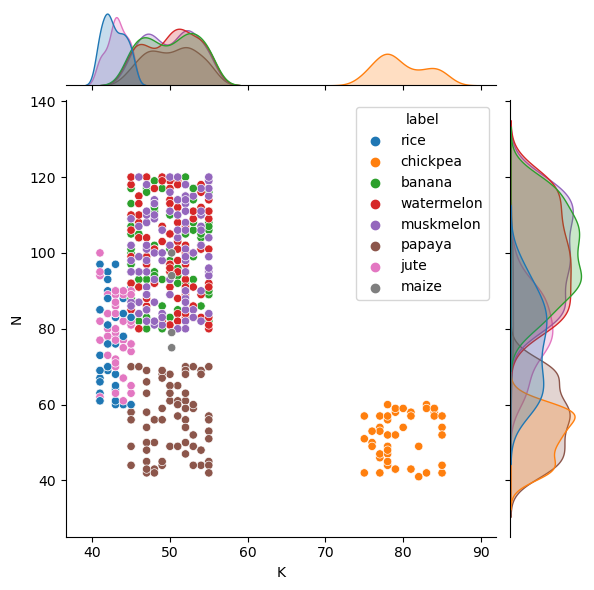

In [23]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

sns.jointplot() can be used for bivariate analysis to plot between humidity and K levels based on Label type. It further generates frequency distribution of classes with respect to features

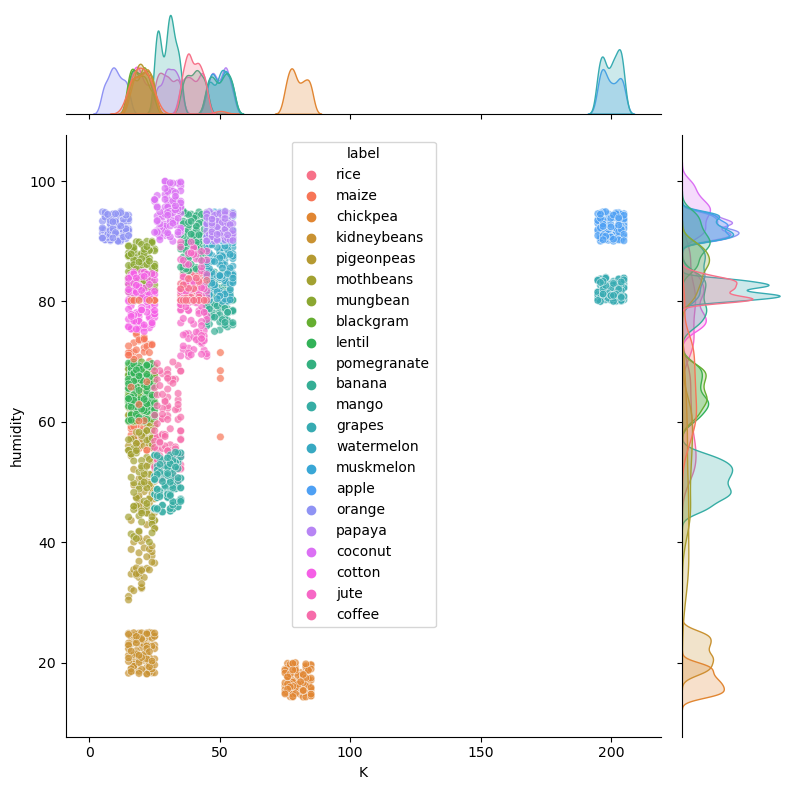

In [24]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

<AxesSubplot:xlabel='ph', ylabel='label'>

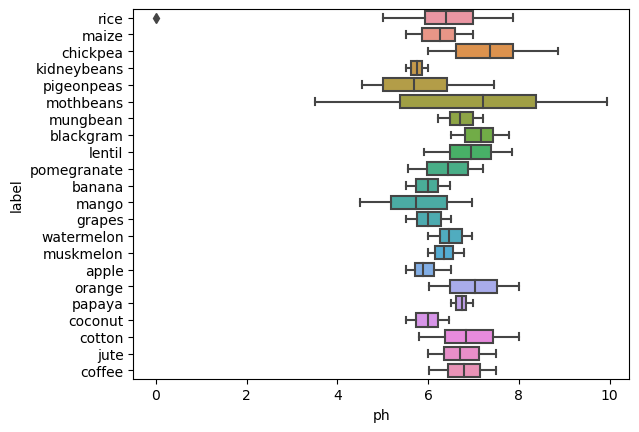

In [25]:
sns.boxplot(y='label',x='ph',data=df)

Phosphorous levels are quite differentiable when it rains heavily (above 150 mm)

<AxesSubplot:xlabel='P', ylabel='label'>

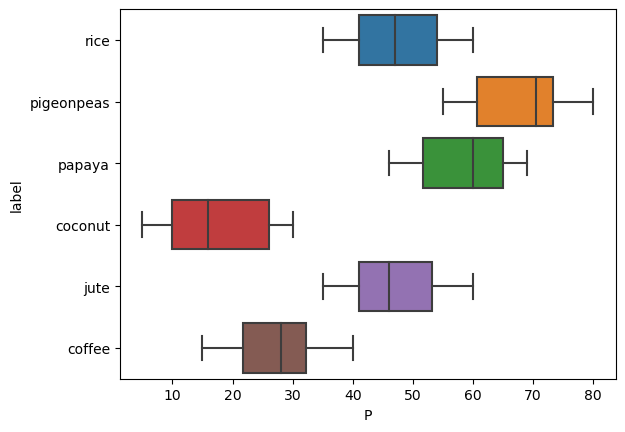

In [26]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

Further analyzing phosphorous levels.
When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.

<AxesSubplot:xlabel='K', ylabel='rainfall'>

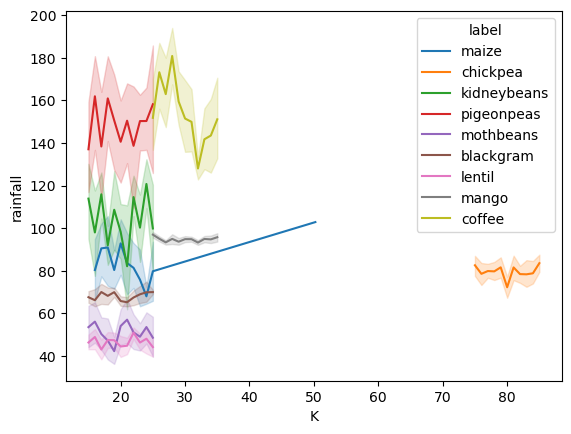

In [27]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

# Dataset pre-processing

In [28]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

In [29]:
y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.

<AxesSubplot:>

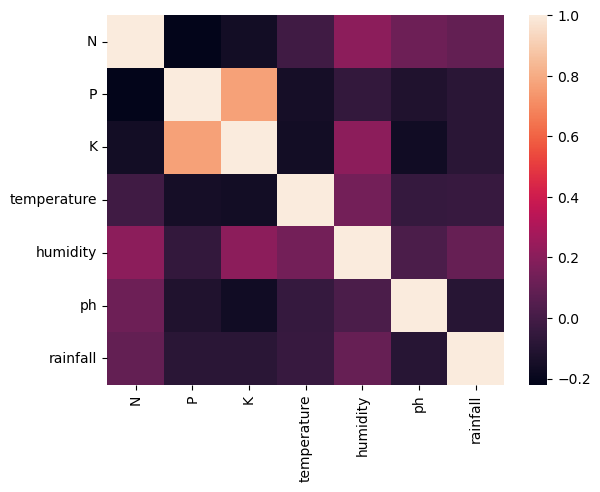

In [30]:
sns.heatmap(X.corr())

## KDEPlot

<AxesSubplot:xlabel='temperature', ylabel='Density'>

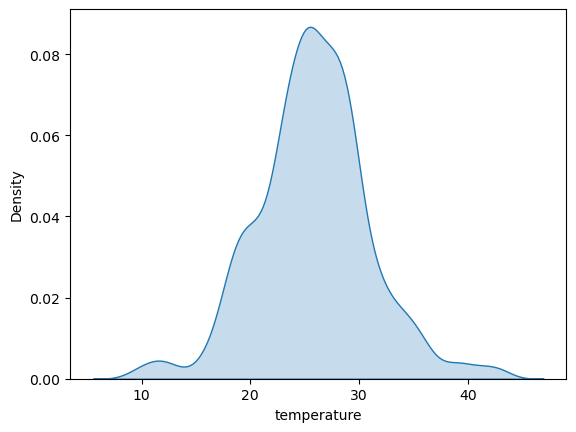

In [31]:
#KDE plot for temperature

# Plot univariate or bivariate distributions using kernel density estimation.
sns.kdeplot(x = 'temperature', data = df, shade=True) 

<AxesSubplot:xlabel='temperature', ylabel='Density'>

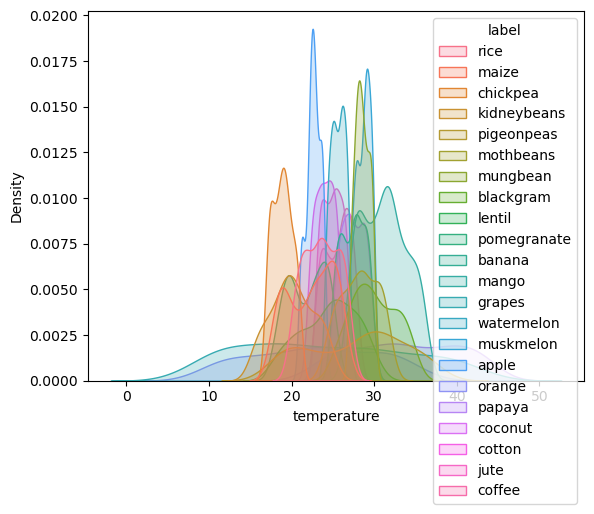

In [32]:
#KDE plot for temperature

# Plot univariate or bivariate distributions using kernel density estimation.
sns.kdeplot(x = 'temperature', data = df, shade=True, hue='label') 

<AxesSubplot:xlabel='humidity', ylabel='Density'>

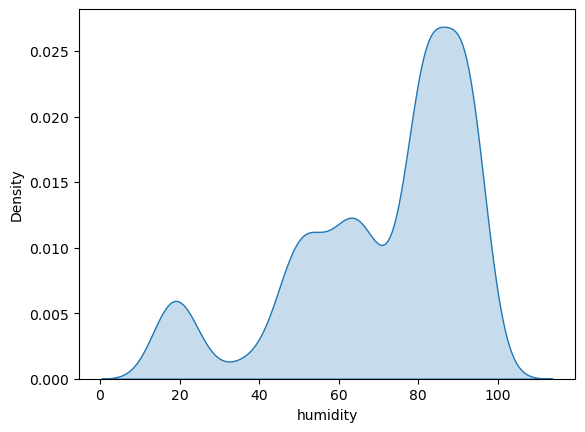

In [33]:
#KDE plot for temperature

# Plot univariate or bivariate distributions using kernel density estimation.
sns.kdeplot(x = 'humidity', data = df, shade=True) 

<AxesSubplot:xlabel='humidity', ylabel='Density'>

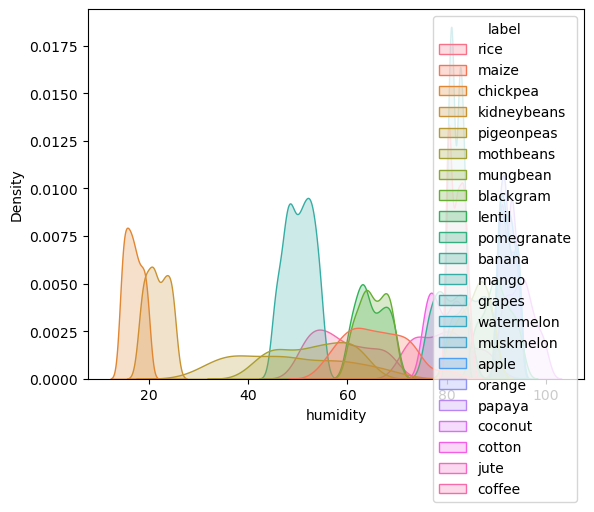

In [34]:
#KDE plot for temperature

# Plot univariate or bivariate distributions using kernel density estimation.
sns.kdeplot(x = 'humidity', data = df, shade=True, hue='label')

<AxesSubplot:xlabel='ph', ylabel='Density'>

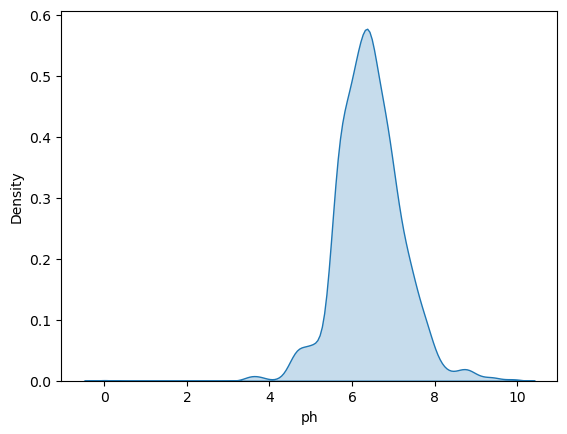

In [35]:
#KDE plot for temperature

# Plot univariate or bivariate distributions using kernel density estimation.
sns.kdeplot(x = 'ph', data = df, shade=True) 

<AxesSubplot:xlabel='ph', ylabel='Density'>

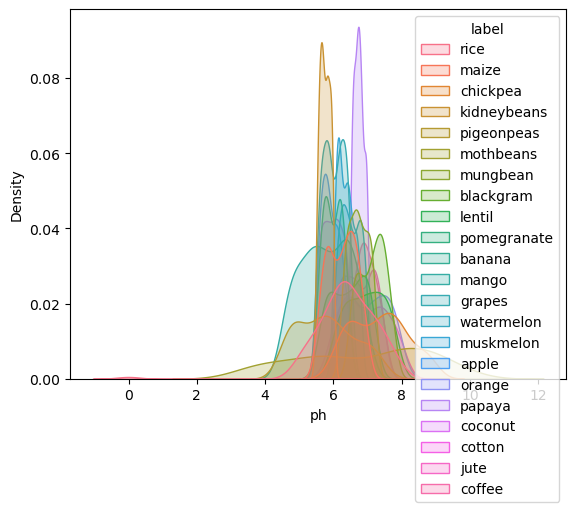

In [36]:
#KDE plot for temperature

# Plot univariate or bivariate distributions using kernel density estimation.
sns.kdeplot(x = 'ph', data = df, shade=True, hue='label') 

<AxesSubplot:xlabel='rainfall', ylabel='Density'>

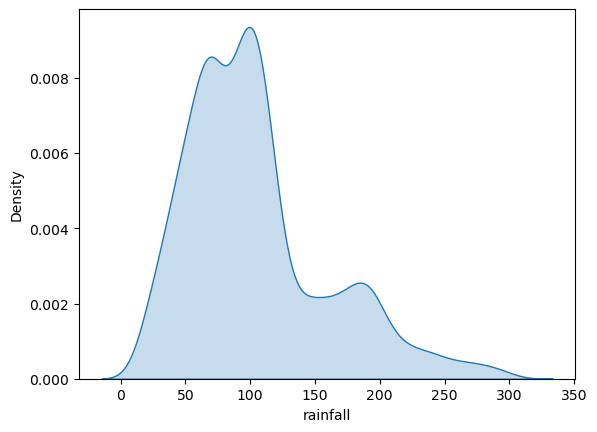

In [37]:
#KDE plot for temperature

# Plot univariate or bivariate distributions using kernel density estimation.
sns.kdeplot(x = 'rainfall', data = df, shade=True) 

<AxesSubplot:xlabel='rainfall', ylabel='Density'>

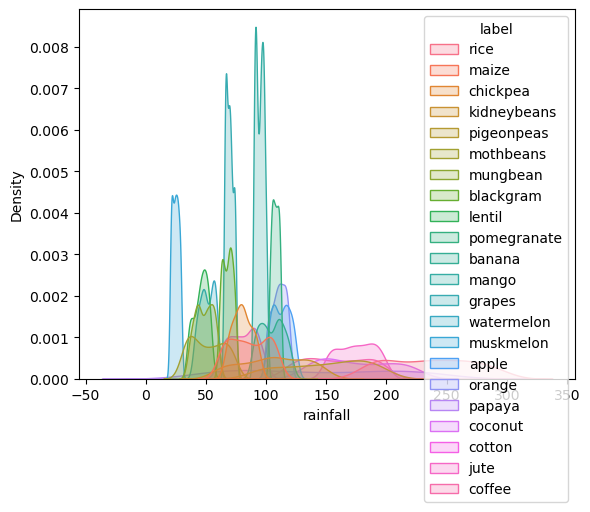

In [38]:
#KDE plot for temperature

# Plot univariate or bivariate distributions using kernel density estimation.
sns.kdeplot(x = 'rainfall', data = df, shade=True, hue='label') 

## BoxPlot

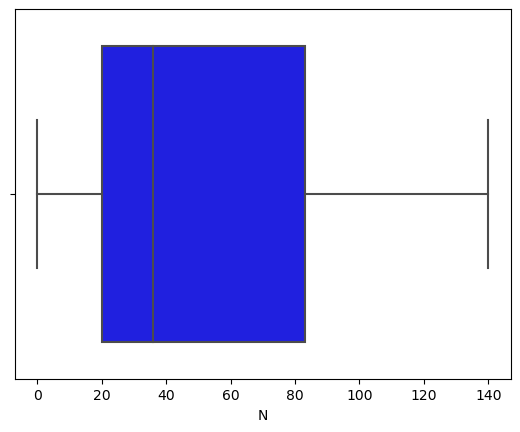

In [39]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(x = 'N', data = df, color = random.choice(colorlist)); # horizontal box plot

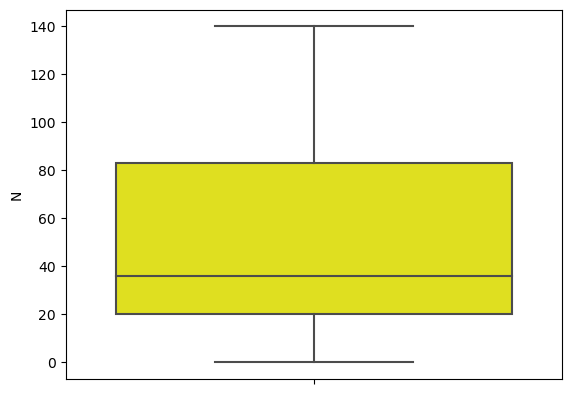

In [40]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(y = 'N', data = df, color = random.choice(colorlist)); # vertical box plot

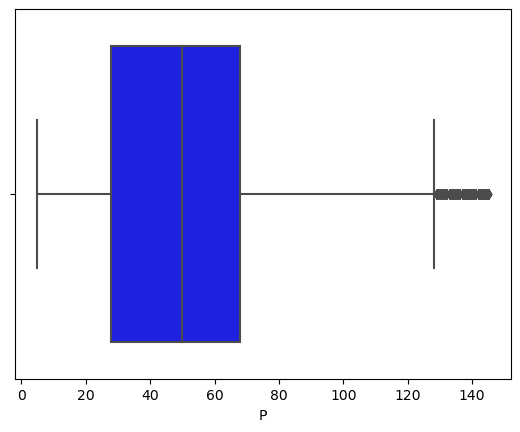

In [41]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(x = 'P', data = df, color = random.choice(colorlist)); # horizontal box plot

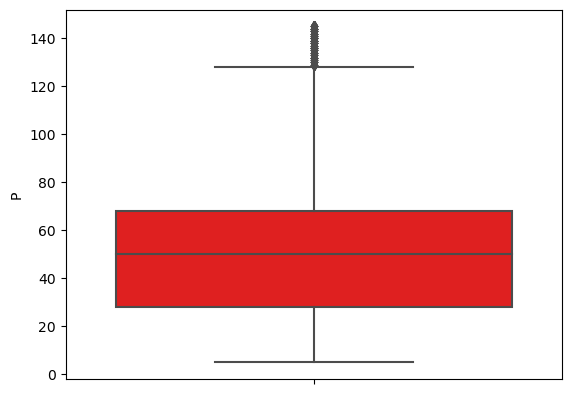

In [42]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(y = 'P', data = df, color = random.choice(colorlist)); # vertical box plot

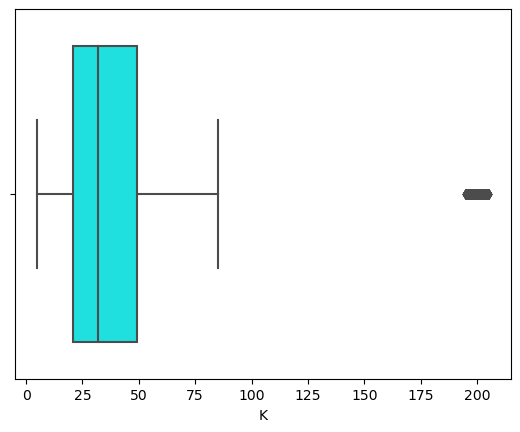

In [43]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(x = 'K', data = df, color = random.choice(colorlist)); # horizontal box plot

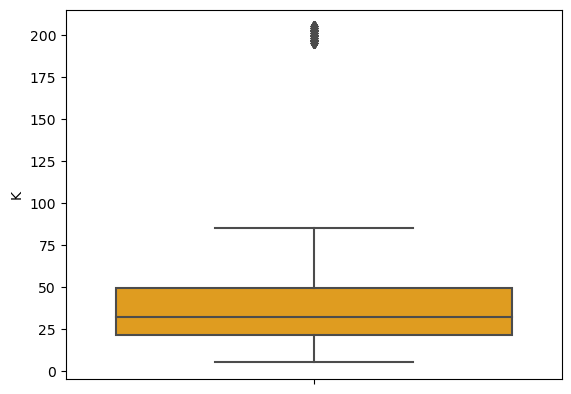

In [44]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(y = 'K', data = df, color = random.choice(colorlist)); # vertical box plot

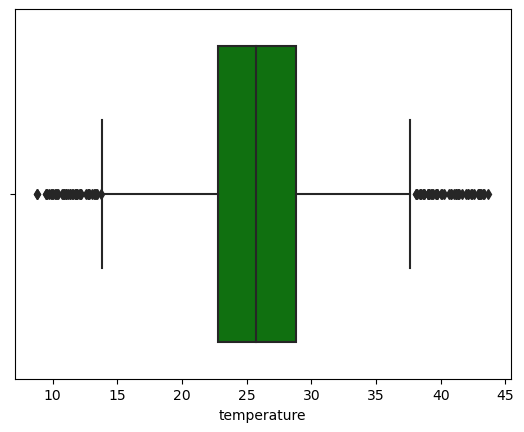

In [45]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(x = 'temperature', data = df, color = random.choice(colorlist)); # horizontal box plot

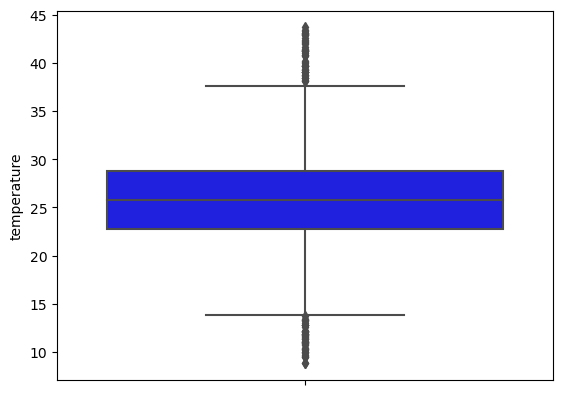

In [46]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(y = 'temperature', data = df, color = random.choice(colorlist)); # vertical box plot

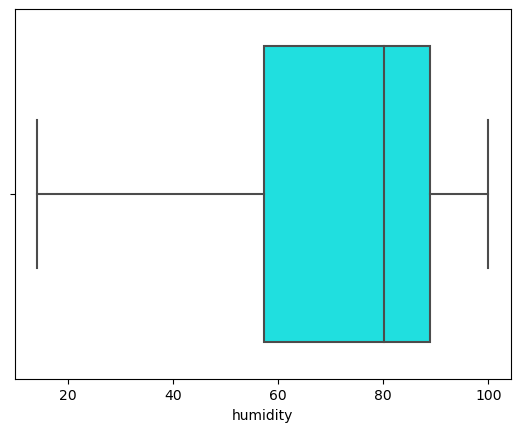

In [47]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(x = 'humidity', data = df, color = random.choice(colorlist)); # horizontal box plot

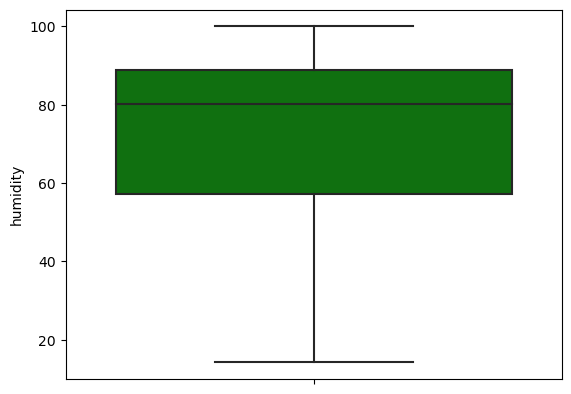

In [48]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(y = 'humidity', data = df, color = random.choice(colorlist)); # vertical box plot

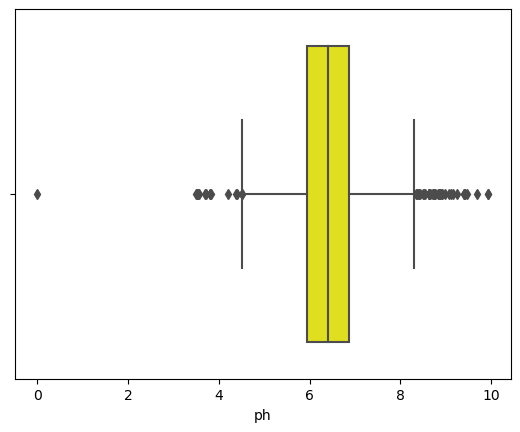

In [49]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(x = 'ph', data = df, color = random.choice(colorlist)); # horizontal box plot

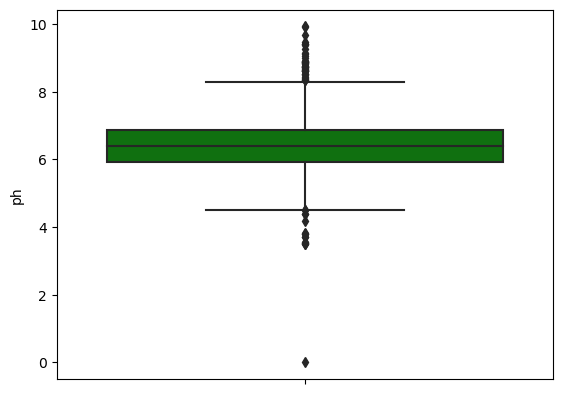

In [50]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(y = 'ph', data = df, color = random.choice(colorlist)); # vertical box plot

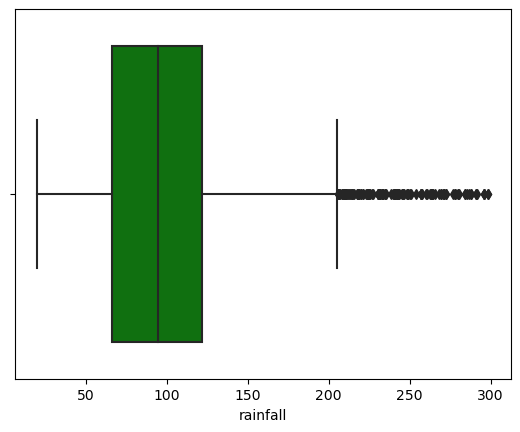

In [51]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(x = 'rainfall', data = df, color = random.choice(colorlist)); # horizontal box plot

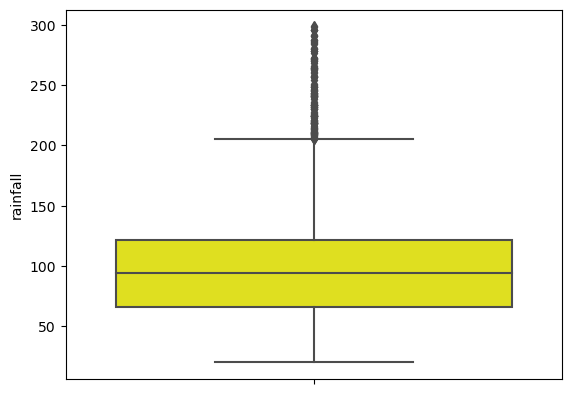

In [52]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue', 'green', 'cyan']
sns.boxplot(y = 'rainfall', data = df, color = random.choice(colorlist)); # vertical box plot

## Hisplot

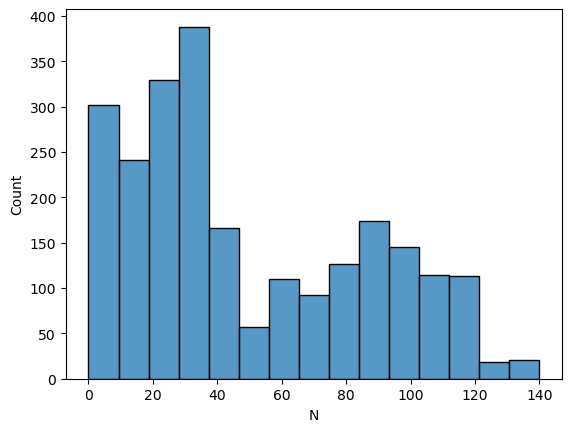

In [53]:
import seaborn as sns
sns.histplot(x = "N", data = df);

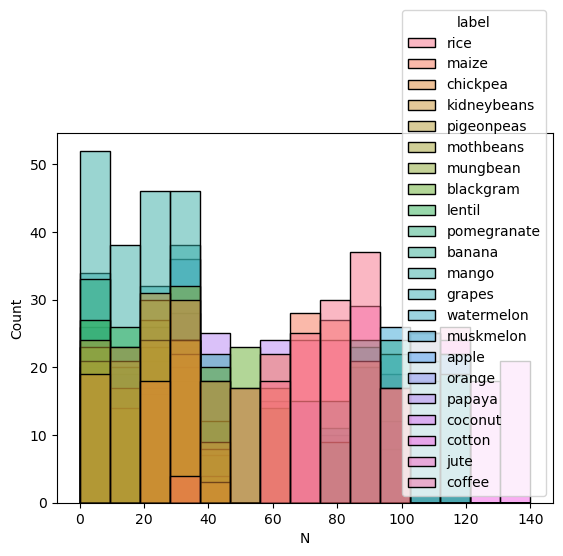

In [60]:
sns.histplot(x = "N", data = df, hue = "label");

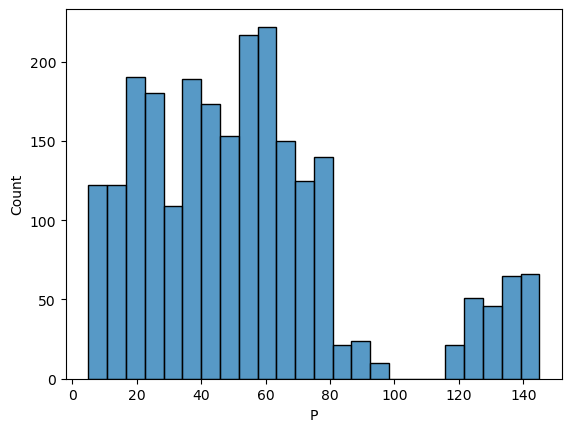

In [54]:
import seaborn as sns
sns.histplot(x = "P", data = df);

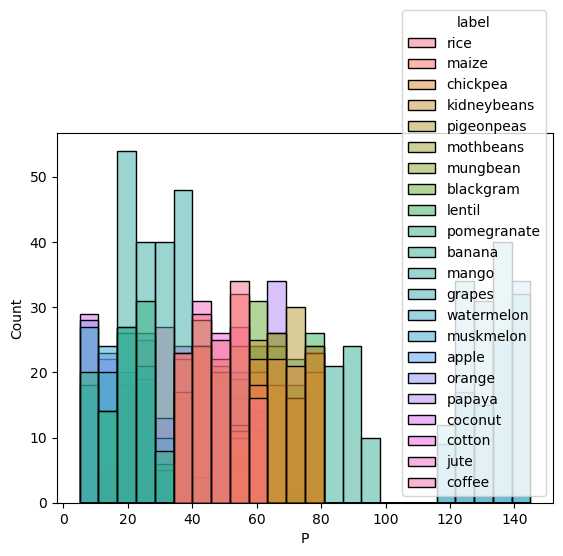

In [61]:
sns.histplot(x = "P", data = df, hue = "label");

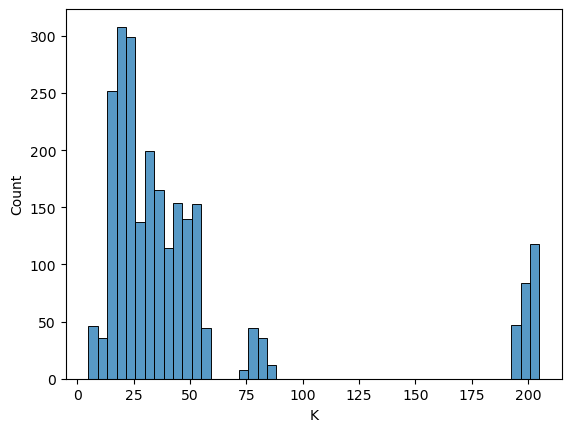

In [55]:
import seaborn as sns
sns.histplot(x = "K", data = df);

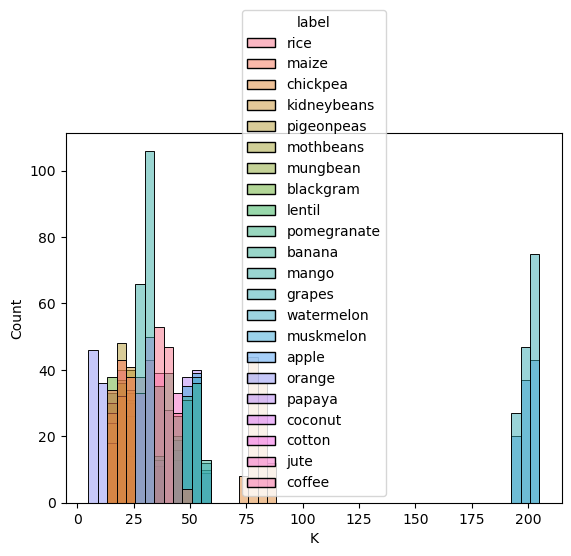

In [62]:
sns.histplot(x = "K", data = df, hue = "label");

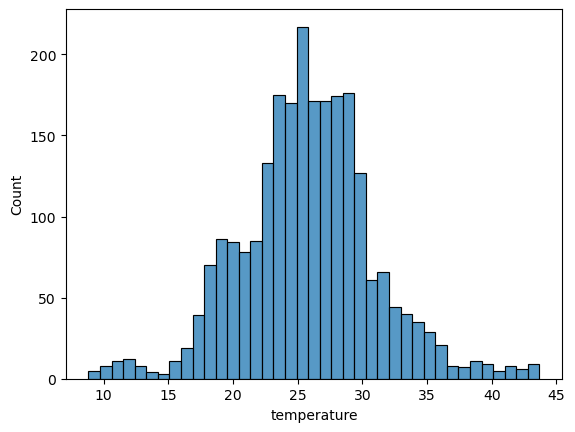

In [56]:
import seaborn as sns
sns.histplot(x = "temperature", data = df);

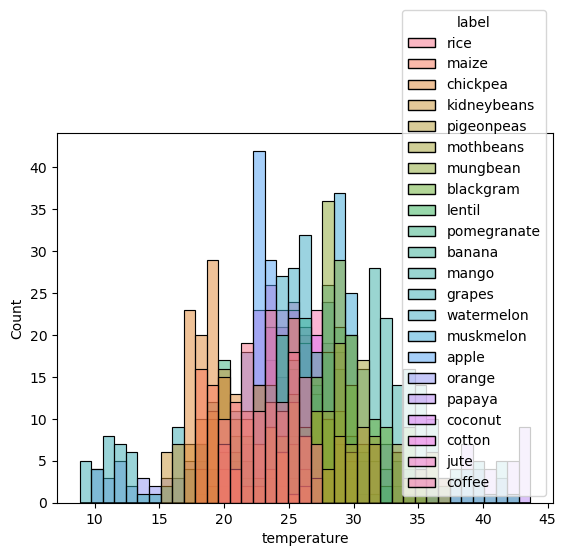

In [63]:
sns.histplot(x = "temperature", data = df, hue = "label");

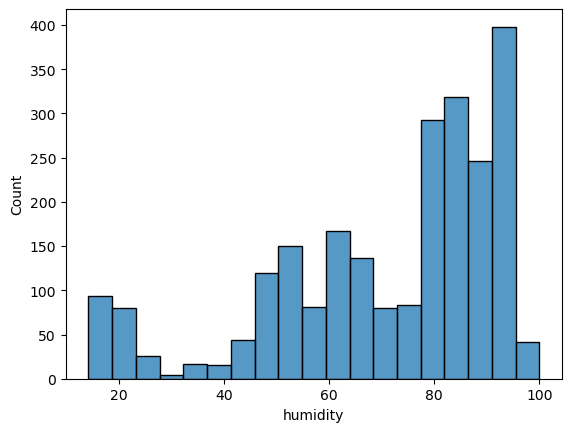

In [57]:
import seaborn as sns
sns.histplot(x = "humidity", data = df);

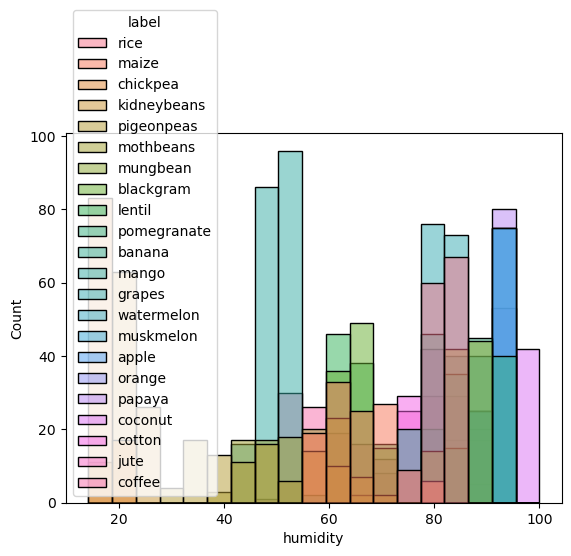

In [64]:
sns.histplot(x = "humidity", data = df, hue = "label");

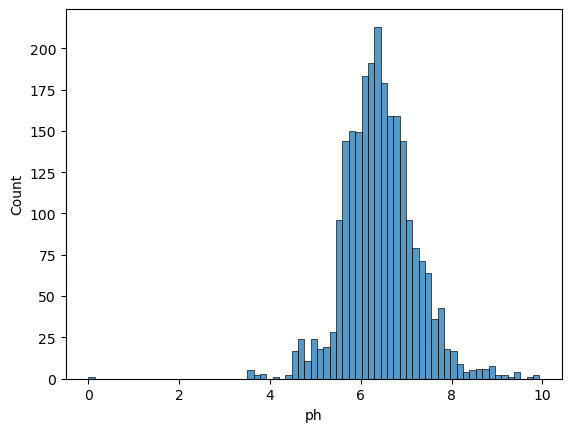

In [58]:
import seaborn as sns
sns.histplot(x = "ph", data = df);

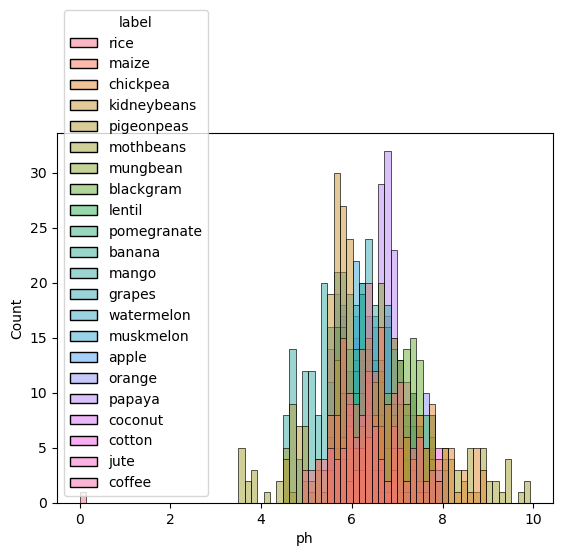

In [65]:
sns.histplot(x = "ph", data = df, hue = "label");

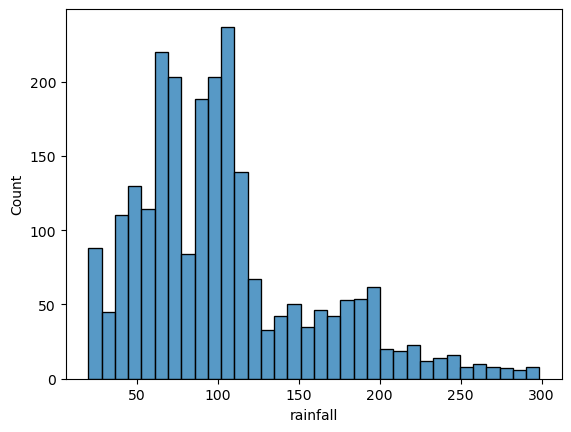

In [59]:
import seaborn as sns
sns.histplot(x = "rainfall", data = df);

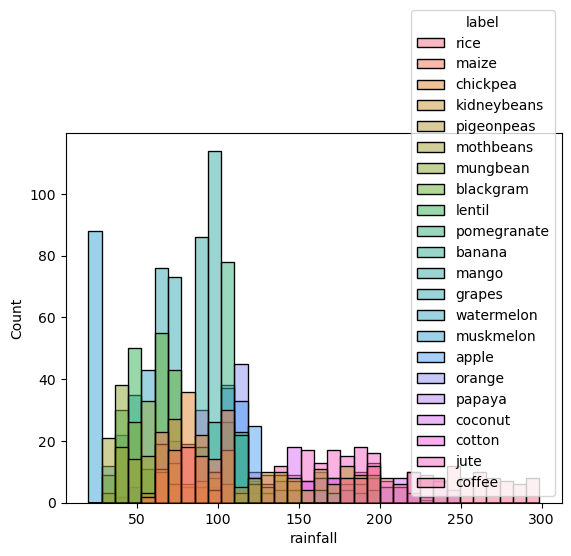

In [66]:
sns.histplot(x = "rainfall", data = df, hue = "label");

## Swarmplot

<AxesSubplot:xlabel='temperature'>

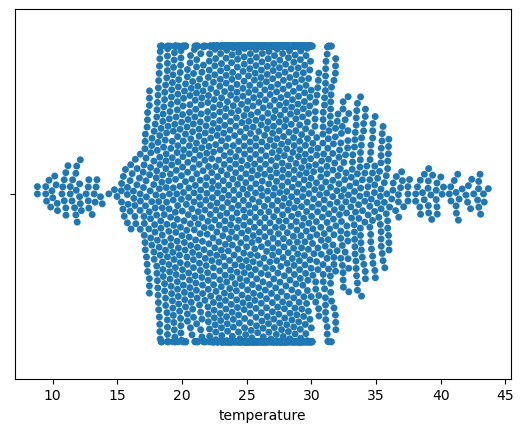

In [67]:
sns.swarmplot(x = 'temperature', data = df)

<AxesSubplot:xlabel='humidity'>

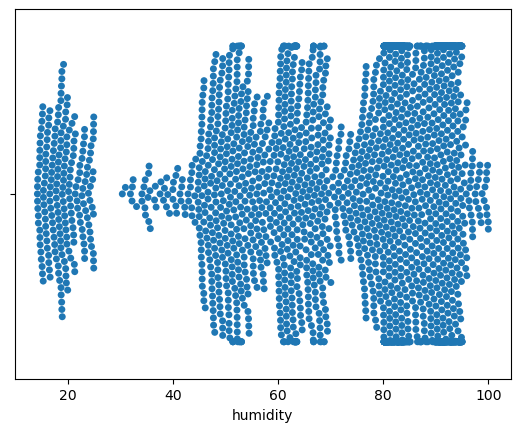

In [68]:
sns.swarmplot(x = 'humidity', data = df)

<AxesSubplot:xlabel='ph'>

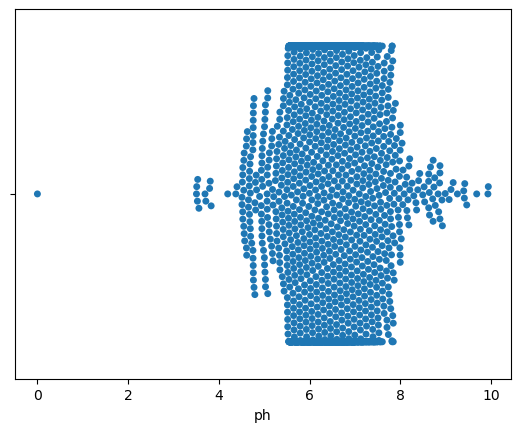

In [69]:
sns.swarmplot(x = 'ph', data = df)

<AxesSubplot:xlabel='rainfall'>

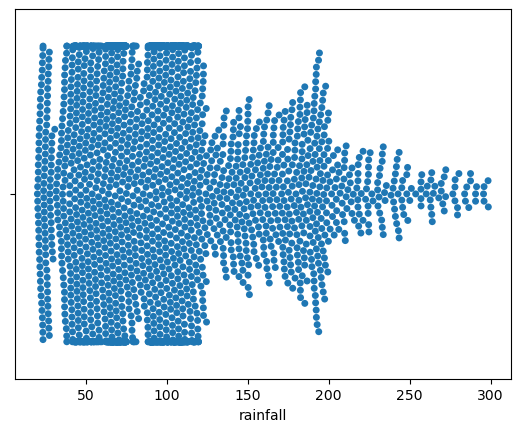

In [70]:
sns.swarmplot(x = 'rainfall', data = df)

<AxesSubplot:xlabel='label', ylabel='temperature'>

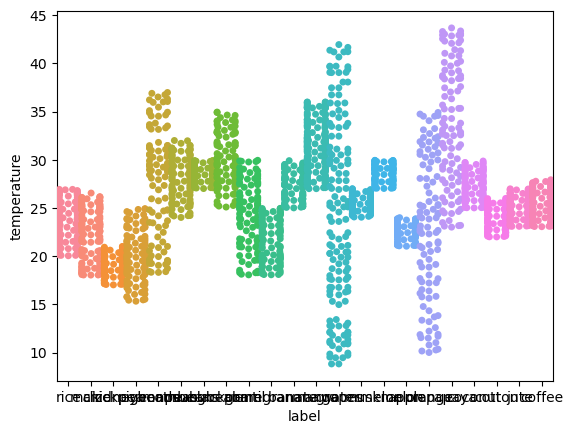

In [73]:
sns.swarmplot(x = 'label', y = 'temperature', data = df)

<AxesSubplot:xlabel='label', ylabel='humidity'>

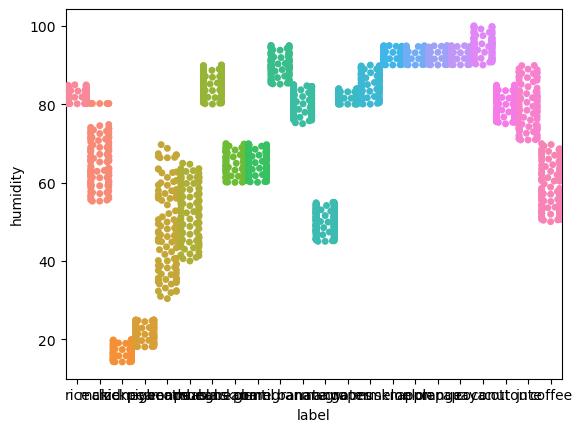

In [74]:
sns.swarmplot(x = 'label', y = 'humidity', data = df)

<AxesSubplot:xlabel='label', ylabel='ph'>

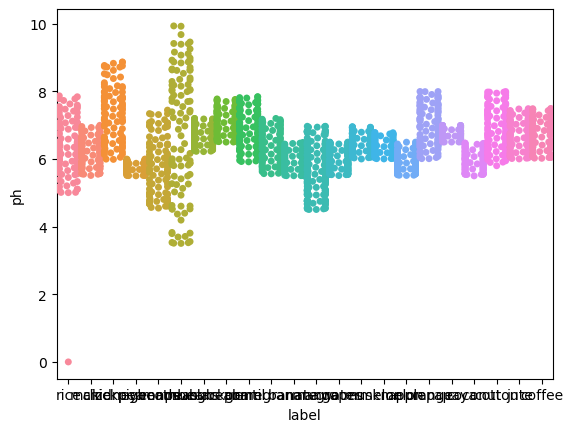

In [75]:
sns.swarmplot(x = 'label', y = 'ph', data = df)

<AxesSubplot:xlabel='label', ylabel='rainfall'>

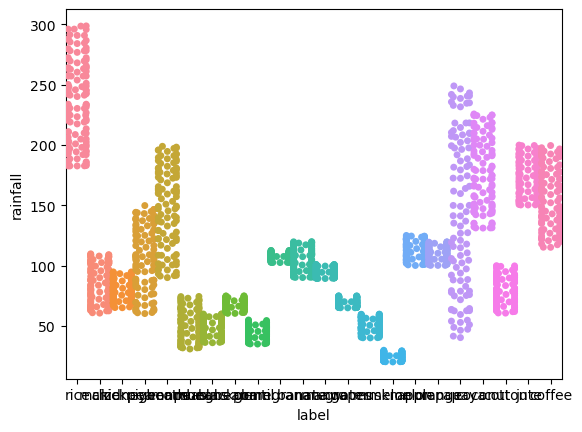

In [76]:
sns.swarmplot(x = 'label', y = 'rainfall', data = df)

## Stripplot

<AxesSubplot:xlabel='label', ylabel='temperature'>

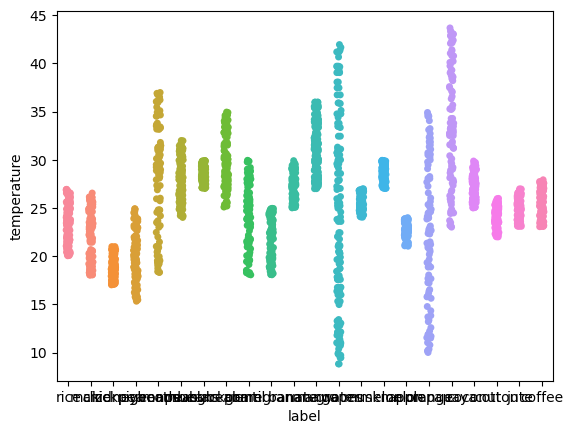

In [77]:
sns.stripplot(x = 'label', y = 'temperature', data = df)

<AxesSubplot:xlabel='label', ylabel='humidity'>

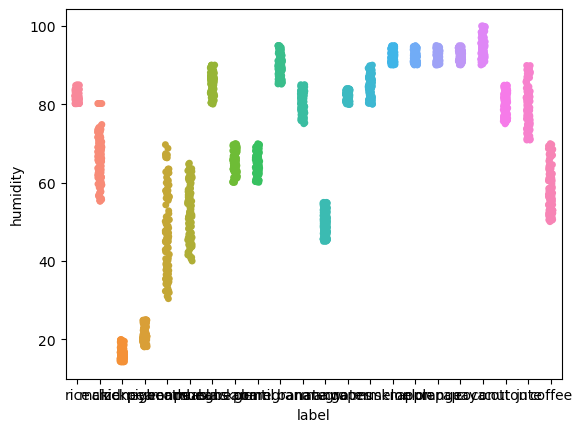

In [78]:
sns.stripplot(x = 'label', y = 'humidity', data = df)

<AxesSubplot:xlabel='label', ylabel='ph'>

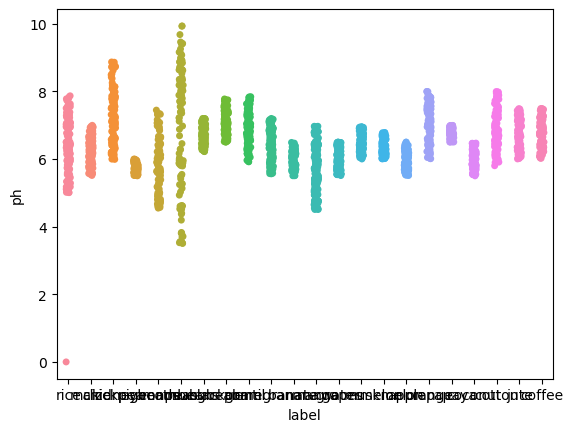

In [79]:
sns.stripplot(x = 'label', y = 'ph', data = df)

<AxesSubplot:xlabel='label', ylabel='rainfall'>

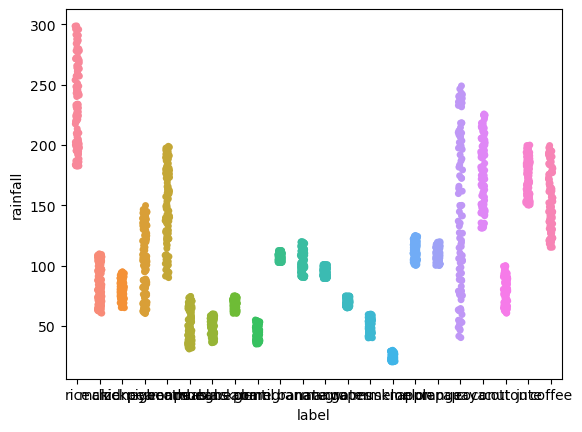

In [80]:
sns.stripplot(x = 'label', y = 'rainfall', data = df)

## Countplot

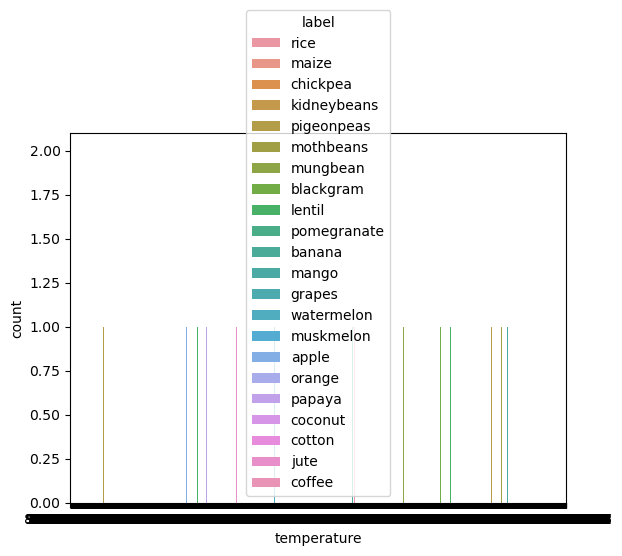

In [81]:
# Show the counts of observations in each categorical bin using bars
sns.countplot(x = 'temperature', data = df, hue = 'label'); 

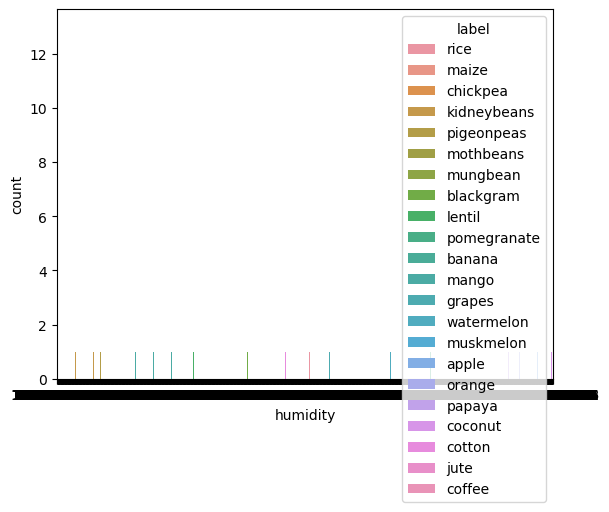

In [82]:
sns.countplot(x = 'humidity', data = df, hue = 'label'); 

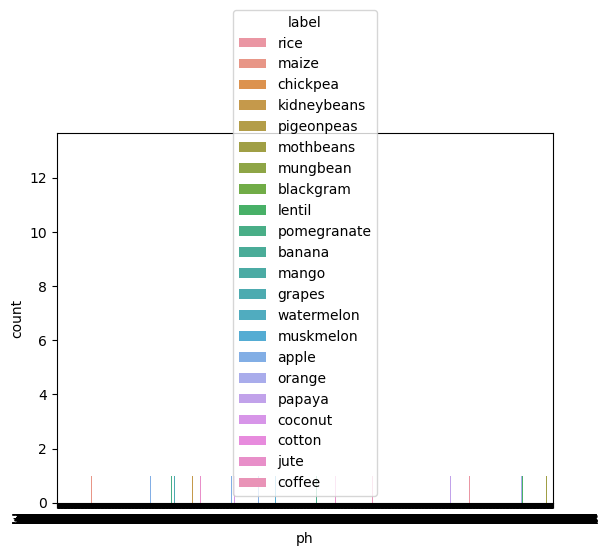

In [83]:
sns.countplot(x = 'ph', data = df, hue = 'label'); 

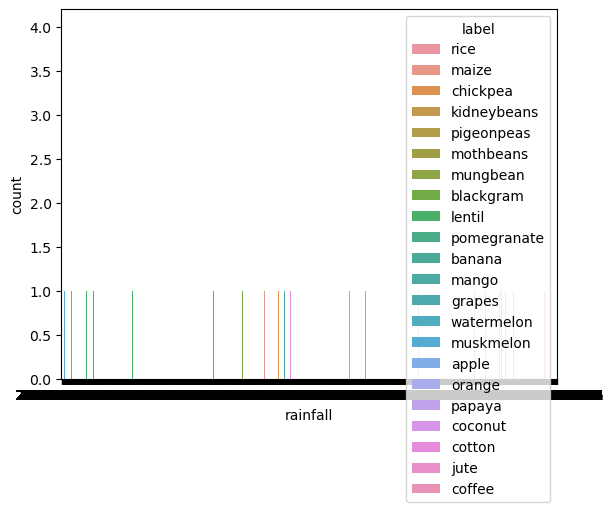

In [84]:
sns.countplot(x = 'rainfall', data = df, hue = 'label'); 

# Feature Scaling

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=20)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Applying One Hot Encoding on Categorical Value

In [87]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [88]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

feature_array=ohe.fit_transform(df[['label']]).toarray()
feature_labels = np.array(ohe.categories_).ravel()
features=pd.DataFrame(feature_array, columns=feature_labels)

In [89]:
features

apple  banana  blackgram  chickpea  coconut  coffee  cotton  grapes  \
0       0.0     0.0        0.0       0.0      0.0     0.0     0.0     0.0   
1       0.0     0.0        0.0       0.0      0.0     0.0     0.0     0.0   
2       0.0     0.0        0.0       0.0      0.0     0.0     0.0     0.0   
3       0.0     0.0        0.0       0.0      0.0     0.0     0.0     0.0   
4       0.0     0.0        0.0       0.0      0.0     0.0     0.0     0.0   
...     ...     ...        ...       ...      ...     ...     ...     ...   
2391    0.0     0.0        0.0       0.0      0.0     0.0     0.0     1.0   
2392    0.0     0.0        0.0       0.0      0.0     0.0     0.0     1.0   
2393    0.0     0.0        0.0       0.0      0.0     0.0     0.0     1.0   
2394    0.0     0.0        0.0       0.0      0.0     0.0     0.0     1.0   
2395    0.0     0.0        0.0       0.0      0.0     0.0     0.0     1.0   

      jute  kidneybeans  ...  mango  mothbeans  mungbean  muskmelon  orange  \
0      0.0          0.0  ...    0.0        0.0       0.0        0.0     0.0   
1      0.0          0.0  ...    0.0        0.0       0.0        0.0     0.0   
2      0.0          0.0  ...    0.0        0.0       0.0        0.0     0.0   
3      0.0          0.0  ...    0.0        0.0       0.0        0.0     0.0   
4      0.0          0.0  ...    0.0        0.0       0.0        0.0     0.0   
...    ...          ...  ...    ...        ...       ...        ...     ...   
2391   0.0          0.0  ...    0.0        0.0       0.0        0.0     0.0   
2392   0.0          0.0  ...    0.0        0.0       0.0        0.0     0.0   
2393   0.0          0.0  ...    0.0        0.0       0.0        0.0     0.0   
2394   0.0          0.0  ...    0.0        0.0       0.0        0.0     0.0   
2395   0.0          0.0  ...    0.0        0.0       0.0        0.0     0.0   

      papaya  pigeonpeas  pomegranate  rice  watermelon  
0        0.0         0.0          0.0   1.0         0.0  
1        0.0         0.0          0.0   1.0         0.0  
2        0.0         0.0          0.0   1.0         0.0  
3        0.0         0.0          0.0   1.0         0.0  
4        0.0         0.0          0.0   1.0         0.0  
...      ...         ...          ...   ...         ...  
2391     0.0         0.0          0.0   0.0         0.0  
2392     0.0         0.0          0.0   0.0         0.0  
2393     0.0         0.0          0.0   0.0         0.0  
2394     0.0         0.0          0.0   0.0         0.0  
2395     0.0         0.0          0.0   0.0         0.0  

[2396 rows x 22 columns]

In [90]:
df_ohe=pd.concat([df,features],axis=1)
df_ohe

N     P     K  temperature   humidity        ph    rainfall label  \
0     90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice   
1     85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice   
2     60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice   
3     74.0  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice   
4     78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice   
...    ...   ...   ...          ...        ...       ...         ...   ...   
2296   NaN   NaN   NaN          NaN        NaN       NaN         NaN   NaN   
2297   NaN   NaN   NaN          NaN        NaN       NaN         NaN   NaN   
2298   NaN   NaN   NaN          NaN        NaN       NaN         NaN   NaN   
2299   NaN   NaN   NaN          NaN        NaN       NaN         NaN   NaN   
2300   NaN   NaN   NaN          NaN        NaN       NaN         NaN   NaN   

      target  apple  ...  mango  mothbeans  mungbean  muskmelon  orange  \
0       20.0    0.0  ...    0.0        0.0       0.0        0.0     0.0   
1       20.0    0.0  ...    0.0        0.0       0.0        0.0     0.0   
2       20.0    0.0  ...    0.0        0.0       0.0        0.0     0.0   
3       20.0    0.0  ...    0.0        0.0       0.0        0.0     0.0   
4       20.0    0.0  ...    0.0        0.0       0.0        0.0     0.0   
...      ...    ...  ...    ...        ...       ...        ...     ...   
2296     NaN    0.0  ...    1.0        0.0       0.0        0.0     0.0   
2297     NaN    0.0  ...    1.0        0.0       0.0        0.0     0.0   
2298     NaN    0.0  ...    1.0        0.0       0.0        0.0     0.0   
2299     NaN    0.0  ...    1.0        0.0       0.0        0.0     0.0   
2300     NaN    0.0  ...    1.0        0.0       0.0        0.0     0.0   

      papaya  pigeonpeas  pomegranate  rice  watermelon  
0        0.0         0.0          0.0   1.0         0.0  
1        0.0         0.0          0.0   1.0         0.0  
2        0.0         0.0          0.0   1.0         0.0  
3        0.0         0.0          0.0   1.0         0.0  
4        0.0         0.0          0.0   1.0         0.0  
...      ...         ...          ...   ...         ...  
2296     0.0         0.0          0.0   0.0         0.0  
2297     0.0         0.0          0.0   0.0         0.0  
2298     0.0         0.0          0.0   0.0         0.0  
2299     0.0         0.0          0.0   0.0         0.0  
2300     0.0         0.0          0.0   0.0         0.0  

[2451 rows x 31 columns]

# MODEL TRAINING

# Confusion Matrix

<AxesSubplot:>

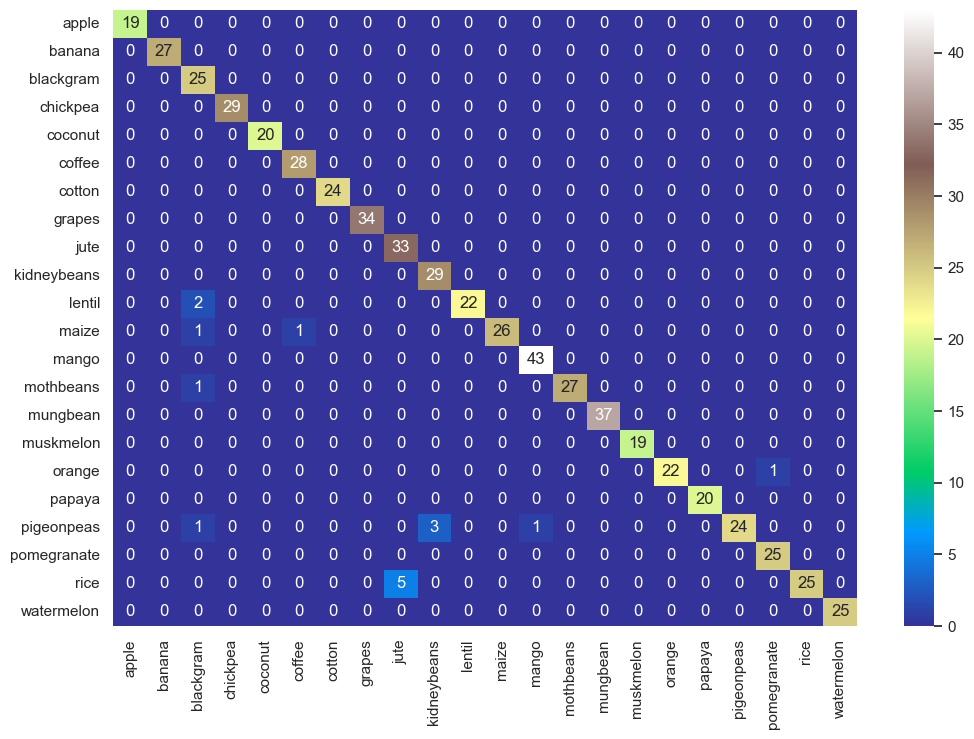

In [107]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

# Model: KNN Classifier

In [108]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9766277128547579

#Different values of n_neighbors to fine tune and get better results

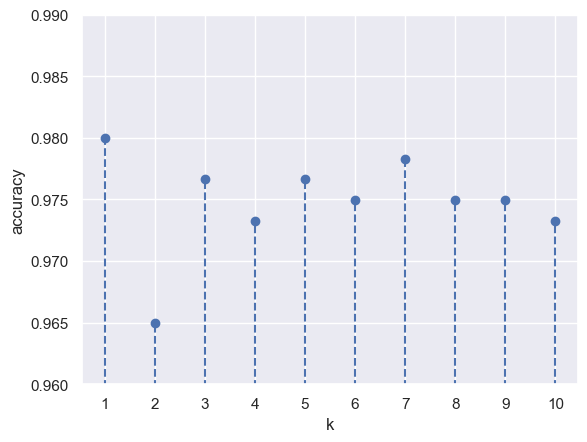

In [109]:
k_range = range(1, 11)
scores= []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

# Model: Support Vector Classifer (SVC)

In [94]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9716193656093489
Rbf Kernel Accuracy:  0.9782971619365609
Poly Kernel Accuracy:  0.9782971619365609


Increasing SVC Linear model accuracy by parameter tuning

# RandomizedSearch CV

In [95]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for hyperparameter tuning
parameters = {
    'C': np.logspace(-3, 3, 7),  # Example range for the 'C' hyperparameter
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': np.arange(0, 5, 1).tolist()
}

# Create the RandomizedSearchCV instance with correct arguments
model = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=parameters,  # Use param_distributions for specifying the hyperparameter grid
    n_iter=10,  # Specify the number of parameter settings that are sampled
    n_jobs=-1,
    cv=4
)

model.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'degree': [0, 1, 2, 3, 4],
                                        'kernel': ['linear', 'rbf', 'poly']})

In [96]:
print(model.best_score_ )
print(model.best_params_ )

0.9855283345706508
{'kernel': 'poly', 'degree': 2, 'C': 1000.0}


# GridSearch CV

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [98]:
print(model.best_score_ )
print(model.best_params_ )

0.9838604305864885
{'C': 0.1, 'gamma': 0.001}


# Model: Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9782971619365609

Visualizing the important features that are taken into consideration by decision trees

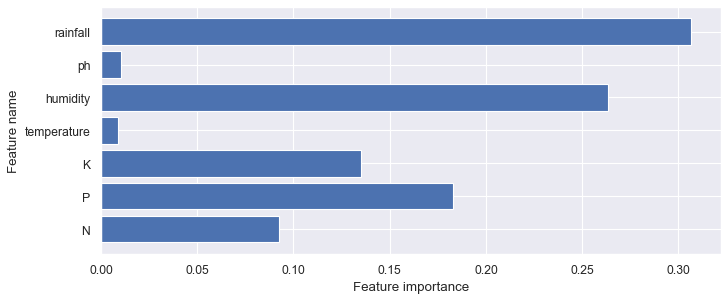

In [100]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

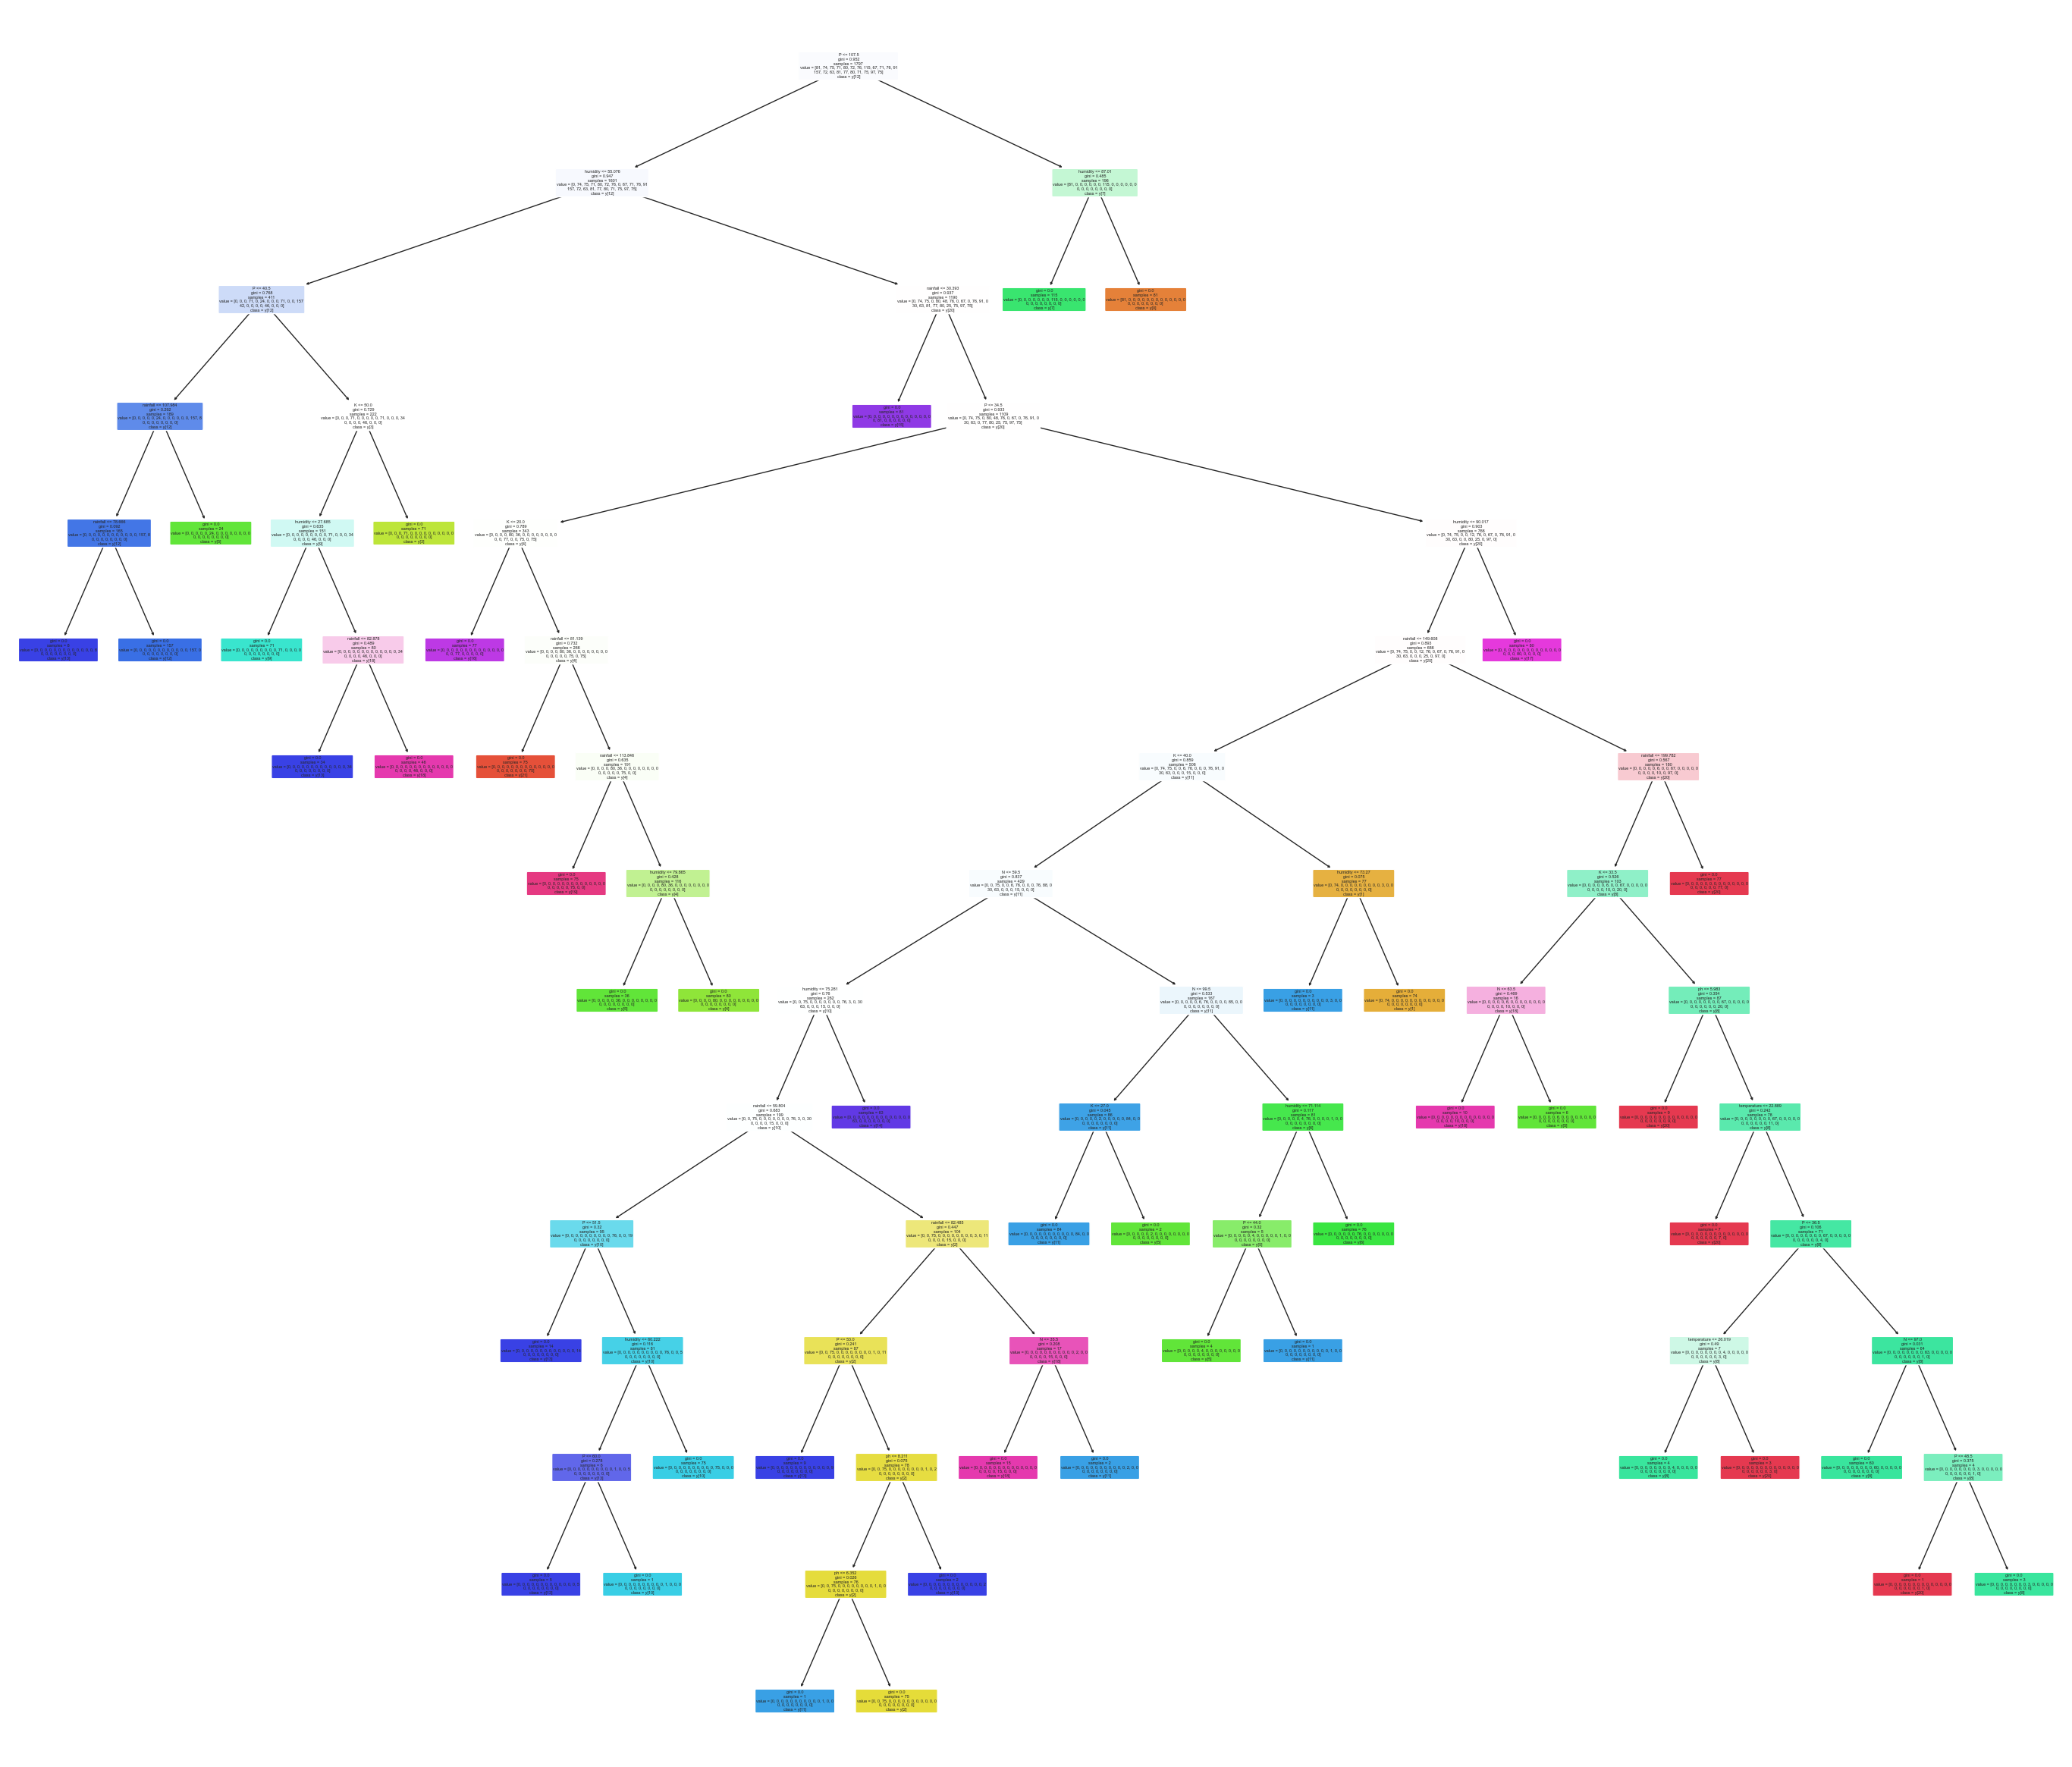

In [106]:
#plotting tree

from IPython.display import display

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#'clf' is decision tree classifier
plt.figure(figsize=(35, 30))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()

# Model: Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.94
RF Accuracy on test set: 0.91


# Model: Support Vector Machine (SVM)

In [46]:
from sklearn.svm import SVR

In [47]:
model = SVR().fit(X_train,y_train)

ytrain_predict=model.predict(X_train)
ytest_predict=model.predict(X_test)

In [48]:
svr_linear = SVR(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svr_poly = SVR(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svr_poly = SVR(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9716193656093489
Rbf Kernel Accuracy:  0.9782971619365609
Poly Kernel Accuracy:  0.9782971619365609


# Classification Report

# Using "YELLOWBRICK" for classification report as they are great for visualizing in a tabular format

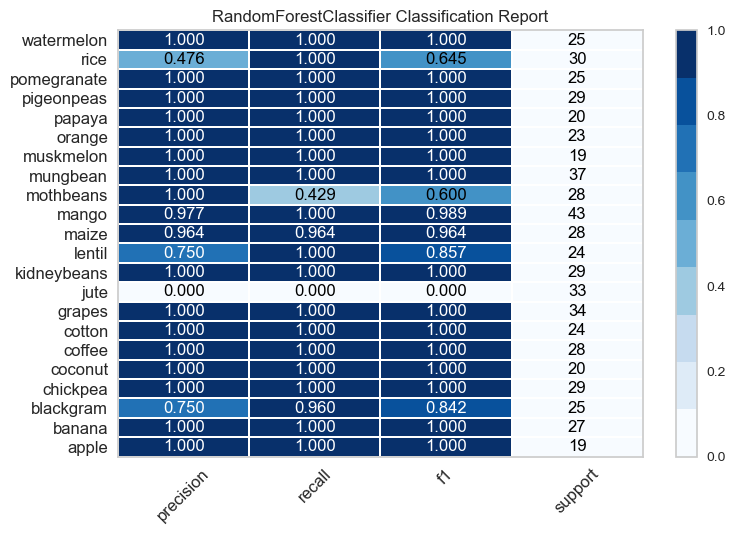

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [49]:
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

# Model: Gradient Boost

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train, y_train)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test,y_test)))

Gradient Boosting accuracy : 0.993322203672788


# Model: XGBoost

In [52]:
import xgboost as xgb

In [55]:
#xg boost data split
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.25, random_state=500) #VAR
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1797, 7) (599, 7) (1797,) (599,)


In [56]:
conda install -c conda-forge xgboost

Retrieving notices: ...working... done
done
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/noarch::babel==2.9.1=pyhd3eb1b0_0
  - defaults/osx-64::imageio==2.19.3=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.3.5=pyhd3eb1b0_0
  - defaults/osx-64::scikit-image==0.19.2=py39hae1ba45_0
  - defaults/osx-64::anaconda-project==0.11.1=py39hecd8cb5_0
  - defaults/osx-64::jupyterlab==3.4.4=py39hecd8cb5_0
  - defaults/osx-64::datashader==0.14.1=py39hecd8cb5_0
  - defaults/osx-64::anaconda==2022.10=py39_0
  - defaults/osx-64::matplotlib==3.5.2=py39hecd8cb5_0
  - defaults/osx-64::hvplot==0.8.0=py39hecd8cb5_0
  - defaults/osx-64::plotly==5.9.0=py39hecd8cb5_0
  - defaults/osx-64::bkcharts==0.2=py39hecd8cb5_1
  - defaults/osx-64::qtconsole==5.3.2=py39hecd8cb5_0
  - defaults/osx-64::ipython==7.31.1=py39hecd8cb5_1
  - defaults/osx-6

ipywidgets-7.6.6     | 102 KB    |                                       |   0% 
ca-certificates-2023 | 151 KB    |                                       |   0% 

libxcb-1.13          | 305 KB    |                                       |   0% 


_anaconda_depends-20 | 69 KB     |                                       |   0% 



xorg-libxau-1.0.11   | 13 KB     |                                       |   0% 




openssl-1.1.1w       | 1.7 MB    |                                       |   0% 





tenacity-8.2.3       | 22 KB     |                                       |   0% 






conda-23.1.0         | 908 KB    |                                       |   0% 







pytz-2023.3.post1    | 183 KB    |                                       |   0% 








libzlib-1.2.12       | 65 KB     |                                       |   0% 









xorg-libxdmcp-1.1.3  | 17 KB     |                                       |   0% 










pygments-2.17.2      | 840 KB    |                    

certifi-2023.11.17   | 155 KB    | ###########4                          |  31% 












anaconda-custom      | 13 KB     | ##################################### | 100% 










pygments-2.17.2      | 840 KB    | #######7                              |  21% 













certifi-2023.11.17   | 155 KB    | ###################                   |  52% 




openssl-1.1.1w       | 1.7 MB    | ############5                         |  34% 






conda-23.1.0         | 908 KB    | #########################4            |  69% 













certifi-2023.11.17   | 155 KB    | ##########################6           |  72% 














pillow-9.2.0         | 44.7 MB   |                                       |   0% 













certifi-2023.11.17   | 155 KB    | ##############################5       |  82% 










pygments-2.17.2      | 840 KB    | #########1                            |  25% 






conda-23.1.0         | 908 KB    | ##########################7           |  72% 




open

pillow-9.2.0         | 44.7 MB   | 7                                     |   2% 




openssl-1.1.1w       | 1.7 MB    | ##################################8   |  94% 














pillow-9.2.0         | 44.7 MB   | 8                                     |   2% 




openssl-1.1.1w       | 1.7 MB    | ###################################9  |  97% 














pillow-9.2.0         | 44.7 MB   | 8                                     |   2% 




openssl-1.1.1w       | 1.7 MB    | ####################################9 | 100% 














pillow-9.2.0         | 44.7 MB   | 8                                     |   2% 














pillow-9.2.0         | 44.7 MB   | 9                                     |   3% 




openssl-1.1.1w       | 1.7 MB    | ##################################### | 100% 














pillow-9.2.0         | 44.7 MB   | #                                     |   3% 














pillow-9.2.0         | 44.7 MB   | #1                                    |   3% 











pillow-9.2.0         | 44.7 MB   | ########3                             |  23% 














pillow-9.2.0         | 44.7 MB   | ########4                             |  23% 














pillow-9.2.0         | 44.7 MB   | ########5                             |  23% 














pillow-9.2.0         | 44.7 MB   | ########6                             |  23% 














pillow-9.2.0         | 44.7 MB   | ########6                             |  23% 














pillow-9.2.0         | 44.7 MB   | ########7                             |  24% 














pillow-9.2.0         | 44.7 MB   | ########8                             |  24% 














pillow-9.2.0         | 44.7 MB   | ########8                             |  24% 














pillow-9.2.0         | 44.7 MB   | ########9                             |  24% 














pillow-9.2.0         | 44.7 MB   | #########                             |  24% 














pillow-9.2.0         | 44.7 MB   | #########      

pillow-9.2.0         | 44.7 MB   | ##############3                       |  39% 














pillow-9.2.0         | 44.7 MB   | ##############4                       |  39% 














pillow-9.2.0         | 44.7 MB   | ##############4                       |  39% 














pillow-9.2.0         | 44.7 MB   | ##############5                       |  39% 














pillow-9.2.0         | 44.7 MB   | ##############5                       |  39% 














pillow-9.2.0         | 44.7 MB   | ##############5                       |  39% 














pillow-9.2.0         | 44.7 MB   | ##############6                       |  40% 














pillow-9.2.0         | 44.7 MB   | ##############6                       |  40% 














pillow-9.2.0         | 44.7 MB   | ##############7                       |  40% 














pillow-9.2.0         | 44.7 MB   | ##############7                       |  40% 














pillow-9.2.0         | 44.7 MB   | ##############7

pillow-9.2.0         | 44.7 MB   | ###################2                  |  52% 














pillow-9.2.0         | 44.7 MB   | ###################2                  |  52% 














pillow-9.2.0         | 44.7 MB   | ###################2                  |  52% 














pillow-9.2.0         | 44.7 MB   | ###################3                  |  52% 














pillow-9.2.0         | 44.7 MB   | ###################3                  |  52% 














pillow-9.2.0         | 44.7 MB   | ###################4                  |  52% 














pillow-9.2.0         | 44.7 MB   | ###################4                  |  53% 














pillow-9.2.0         | 44.7 MB   | ###################4                  |  53% 














pillow-9.2.0         | 44.7 MB   | ###################5                  |  53% 














pillow-9.2.0         | 44.7 MB   | ###################5                  |  53% 














pillow-9.2.0         | 44.7 MB   | ###############

pillow-9.2.0         | 44.7 MB   | ########################              |  65% 














pillow-9.2.0         | 44.7 MB   | ########################1             |  65% 














pillow-9.2.0         | 44.7 MB   | ########################1             |  65% 














pillow-9.2.0         | 44.7 MB   | ########################1             |  65% 














pillow-9.2.0         | 44.7 MB   | ########################2             |  65% 














pillow-9.2.0         | 44.7 MB   | ########################2             |  66% 














pillow-9.2.0         | 44.7 MB   | ########################2             |  66% 














pillow-9.2.0         | 44.7 MB   | ########################3             |  66% 














pillow-9.2.0         | 44.7 MB   | ########################3             |  66% 














pillow-9.2.0         | 44.7 MB   | ########################4             |  66% 














pillow-9.2.0         | 44.7 MB   | ###############

pillow-9.2.0         | 44.7 MB   | #############################5        |  80% 














pillow-9.2.0         | 44.7 MB   | #############################5        |  80% 














pillow-9.2.0         | 44.7 MB   | #############################6        |  80% 














pillow-9.2.0         | 44.7 MB   | #############################6        |  80% 














pillow-9.2.0         | 44.7 MB   | #############################7        |  80% 














pillow-9.2.0         | 44.7 MB   | #############################8        |  81% 














pillow-9.2.0         | 44.7 MB   | #############################8        |  81% 














pillow-9.2.0         | 44.7 MB   | #############################9        |  81% 














pillow-9.2.0         | 44.7 MB   | ##############################        |  81% 














pillow-9.2.0         | 44.7 MB   | ##############################        |  81% 














pillow-9.2.0         | 44.7 MB   | ###############

pillow-9.2.0         | 44.7 MB   | ####################################4 |  98% 














pillow-9.2.0         | 44.7 MB   | ####################################5 |  99% 














pillow-9.2.0         | 44.7 MB   | ####################################5 |  99% 














pillow-9.2.0         | 44.7 MB   | ####################################6 |  99% 














pillow-9.2.0         | 44.7 MB   | ####################################7 |  99% 














pillow-9.2.0         | 44.7 MB   | ####################################7 |  99% 














pillow-9.2.0         | 44.7 MB   | ####################################8 | 100% 














pillow-9.2.0         | 44.7 MB   | ####################################9 | 100% 














pillow-9.2.0         | 44.7 MB   | ####################################9 | 100% 














                                                                                
                                                                

In [57]:
#implementation of xgboost
#pip install xgboost paste in anaconda cmd
import xgboost as xgb
xgb_model=xgb.XGBRegressor(objective="reg:squarederror")
value_xgb=xgb_model.fit(X_train,y_train)
ytrain_predict=value_xgb.predict(X_train)
ytest_predict=value_xgb.predict(X_test)

## RandomizedSearch CV

In [58]:
#Randomize CV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(X) for X in np.linspace(start = 200, stop = 1000, num = 20)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(X) for X in np.linspace(10, 100,10)]
learning_rate=[0.001, 0.1, 0.25, 0.5, 0.3]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate':learning_rate               
              }
print(random_grid)

{'n_estimators': [200, 242, 284, 326, 368, 410, 452, 494, 536, 578, 621, 663, 705, 747, 789, 831, 873, 915, 957, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'learning_rate': [0.001, 0.1, 0.25, 0.5, 0.3]}


In [59]:
xgb_randomcv=RandomizedSearchCV(estimator=xgb_model,param_distributions=random_grid,n_iter=25,cv=5,verbose=2, random_state=100,n_jobs=-1)
xgb_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[03:58:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                         

[03:57:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.25, max_depth=60, max_features=log2, n_estimators=368; total time=   0.7s
[03:57:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.3, max_depth=80, max_features=sqrt, n_estimators=200; total time=   0.5s
[03:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.3, max_depth=80, max_features=sqrt, n_estimators=200; total time=   0.4s
[03:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.5, max_depth=10, max_features=log2, n_estimators=1000; total

[03:57:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.25, max_depth=60, max_features=log2, n_estimators=368; total time=   0.7s
[03:57:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.3, max_depth=80, max_features=sqrt, n_estimators=200; total time=   0.5s
[03:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.5, max_depth=10, max_features=log2, n_estimators=1000; total time=   1.0s
[03:57:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.5, max_depth=10, max_features=log2, n_estimators=1000; tota

[03:57:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.25, max_depth=60, max_features=log2, n_estimators=368; total time=   0.7s
[03:57:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.3, max_depth=80, max_features=sqrt, n_estimators=200; total time=   0.5s
[03:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.3, max_depth=80, max_features=sqrt, n_estimators=200; total time=   0.5s
[03:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[CV] END learning_rate=0.5, max_depth=10, max_features=log2, n_estimators=1000; total

# Explainable AI (LIME)

In [54]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=np.array(X_train), 
    feature_names=X_train.columns,
    verbose=True,
    mode='regression'
)


In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=clf.predict
)

exp.show_in_notebook(show_table=True)